# 1. Library and Constants

In [349]:
import os
import pandas as pd
from collections import Counter

import matplotlib.pyplot as plt
import seaborn as sns

import eda
from importlib import reload
reload(eda)

from eda import summarize_data, generate_eda_plot

In [350]:
pd.set_option('display.max_columns', 90)
pd.set_option('display.max_rows', 90)

# 2. Exploratory Data Analysis (EDA)

In [351]:
data_dictionary_df = pd.read_csv(r'data\data_dictionary.csv')
# data_dictionary_df

In [352]:
train_df = pd.read_csv(r'data\train.csv')
print(train_df.shape)
train_df.head()

(3960, 82)


,id,Basic_Demos-Enroll_Season,Basic_Demos-Age,Basic_Demos-Sex,CGAS-Season,CGAS-CGAS_Score,Physical-Season,Physical-BMI,Physical-Height,Physical-Weight,Physical-Waist_Circumference,Physical-Diastolic_BP,Physical-HeartRate,Physical-Systolic_BP,Fitness_Endurance-Season,Fitness_Endurance-Max_Stage,Fitness_Endurance-Time_Mins,Fitness_Endurance-Time_Sec,FGC-Season,FGC-FGC_CU,FGC-FGC_CU_Zone,FGC-FGC_GSND,FGC-FGC_GSND_Zone,FGC-FGC_GSD,FGC-FGC_GSD_Zone,FGC-FGC_PU,FGC-FGC_PU_Zone,FGC-FGC_SRL,FGC-FGC_SRL_Zone,FGC-FGC_SRR,FGC-FGC_SRR_Zone,FGC-FGC_TL,FGC-FGC_TL_Zone,BIA-Season,BIA-BIA_Activity_Level_num,BIA-BIA_BMC,BIA-BIA_BMI,BIA-BIA_BMR,BIA-BIA_DEE,BIA-BIA_ECW,BIA-BIA_FFM,BIA-BIA_FFMI,BIA-BIA_FMI,BIA-BIA_Fat,BIA-BIA_Frame_num,BIA-BIA_ICW,BIA-BIA_LDM,BIA-BIA_LST,BIA-BIA_SMM,BIA-BIA_TBW,PAQ_A-Season,PAQ_A-PAQ_A_Total,PAQ_C-Season,PAQ_C-PAQ_C_Total,PCIAT-Season,PCIAT-PCIAT_01,PCIAT-PCIAT_02,PCIAT-PCIAT_03,PCIAT-PCIAT_04,PCIAT-PCIAT_05,PCIAT-PCIAT_06,PCIAT-PCIAT_07,PCIAT-PCIAT_08,PCIAT-PCIAT_09,PCIAT-PCIAT_10,PCIAT-PCIAT_11,PCIAT-PCIAT_12,PCIAT-PCIAT_13,PCIAT-PCIAT_14,PCIAT-PCIAT_15,PCIAT-PCIAT_16,PCIAT-PCIAT_17,PCIAT-PCIAT_18,PCIAT-PCIAT_19,PCIAT-PCIAT_20,PCIAT-PCIAT_Total,SDS-Season,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-Season,PreInt_EduHx-computerinternet_hoursday,sii
0,00008ff9,Fall,5,0,Winter,51.0,Fall,16.877316,46.0,50.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fall,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,7.0,0.0,6.0,0.0,6.0,1.0,Fall,2.0,2.66855,16.8792,932.498,1492.00,8.25598,41.5862,13.8177,3.06143,9.21377,1.0,24.4349,8.89536,38.9177,19.5413,32.6909,NaN,NaN,NaN,NaN,Fall,5.0,4.0,4.0,0.0,4.0,0.0,0.0,4.0,0.0,0.0,4.0,0.0,4.0,4.0,4.0,4.0,4.0,4.0,2.0,4.0,55.0,NaN,NaN,NaN,Fall,3.0,2.0
1,000fd460,Summer,9,0,NaN,NaN,Fall,14.035590,48.0,46.0,22.0,75.0,70.0,122.0,NaN,NaN,NaN,NaN,Fall,3.0,0.0,NaN,NaN,NaN,NaN,5.0,0.0,11.0,1.0,11.0,1.0,3.0,0.0,Winter,2.0,2.57949,14.0371,936.656,1498.65,6.01993,42.0291,12.8254,1.21172,3.97085,1.0,21.0352,14.97400,39.4497,15.4107,27.0552,NaN,NaN,Fall,2.340,Fall,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Fall,46.0,64.0,Summer,0.0,0.0
2,00105258,Summer,10,1,Fall,71.0,Fall,16.648696,56.5,75.6,NaN,65.0,94.0,117.0,Fall,5.0,7.0,33.0,Fall,20.0,1.0,10.2,1.0,14.7,2.0,7.0,1.0,10.0,1.0,10.0,1.0,5.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Summer,2.170,Fall,5.0,2.0,2.0,1.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,2.0,1.0,1.0,28.0,Fall,38.0,54.0,Summer,2.0,0.0
3,00115b9f,Winter,9,0,Fall,71.0,Summer,18.292347,56.0,81.6,NaN,60.0,97.0,117.0,Summer,6.0,9.0,37.0,Summer,18.0,1.0,NaN,NaN,NaN,NaN,5.0,0.0,7.0,0.0,7.0,0.0,7.0,1.0,Summer,3.0,3.84191,18.2943,1131.430,1923.44,15.59250,62.7757,14.0740,4.22033,18.82430,2.0,30.4041,16.77900,58.9338,26.4798,45.9966,NaN,NaN,Winter,2.451,Summer,4.0,2.0,4.0,0.0,5.0,1.0,0.0,3.0,2.0,2.0,3.0,0.0,3.0,0.0,0.0,3.0,4.0,3.0,4.0,1.0,44.0,Summer,31.0,45.0,Winter,0.0,1.0
4,0016bb22,Spring,18,1,Summer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Summer,1.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [353]:
summarize_data(train_df)


------------------------Type & Null Analysis------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3960 entries, 0 to 3959
Data columns (total 82 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   id                                      3960 non-null   object 
 1   Basic_Demos-Enroll_Season               3960 non-null   object 
 2   Basic_Demos-Age                         3960 non-null   int64  
 3   Basic_Demos-Sex                         3960 non-null   int64  
 4   CGAS-Season                             2555 non-null   object 
 5   CGAS-CGAS_Score                         2421 non-null   float64
 6   Physical-Season                         3310 non-null   object 
 7   Physical-BMI                            3022 non-null   float64
 8   Physical-Height                         3027 non-null   float64
 9   Physical-Weight                         3076 non-null   flo

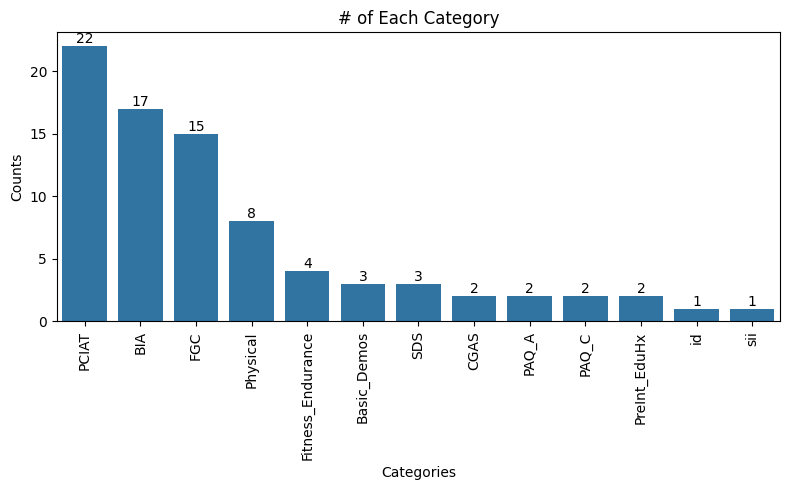

In [354]:
fig, ax = plt.subplots(1, 1, figsize=(8, 5))

# Count of each category
variable_categories = set(map(lambda x: x.split(sep='-')[0], train_df.columns.values))
variable_category_count = Counter(map(lambda x: x.split(sep='-')[0], train_df.columns.values))

# Sort of category count
variable_category_count = dict(variable_category_count.most_common())

# Create bar plot
ax = sns.barplot(x=variable_category_count.keys(), y=variable_category_count.values())
ax.set(xlabel='Categories', ylabel='Counts', title='# of Each Category')
ax.bar_label(ax.containers[0])
plt.tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

## 2.1 Demographic Data

-----------------------------Sample Data----------------------------
  Basic_Demos-Enroll_Season  Basic_Demos-Age  Basic_Demos-Sex
0                      Fall                5                0
1                    Summer                9                0
2                    Summer               10                1
3                    Winter                9                0
4                    Spring               18                1

------------------------Type & Null Analysis------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3960 entries, 0 to 3959
Data columns (total 3 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Basic_Demos-Enroll_Season  3960 non-null   object
 1   Basic_Demos-Age            3960 non-null   int64 
 2   Basic_Demos-Sex            3960 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 92.9+ KB
None

------------------------Categorical Analysis-------

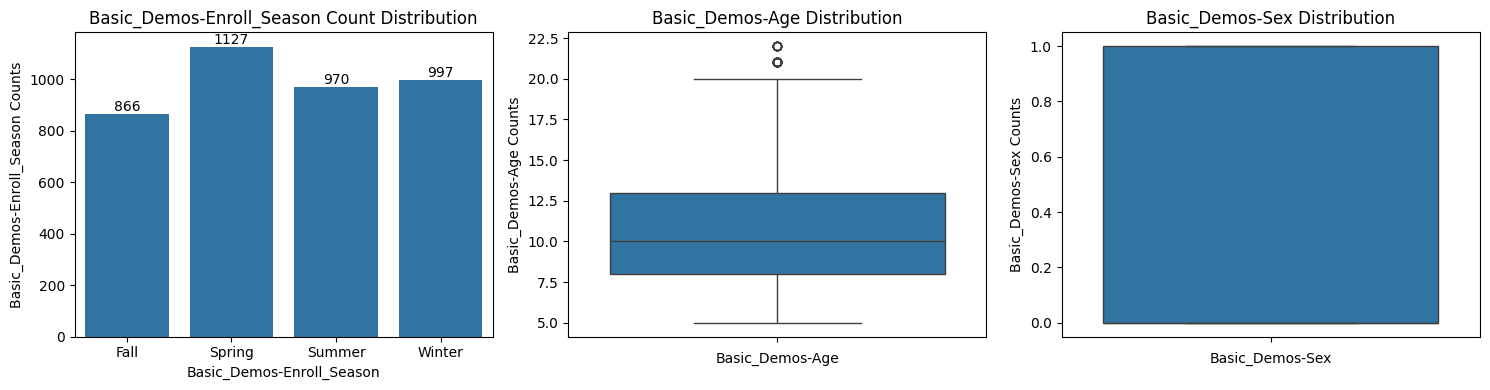

In [355]:
# Get the demographic data
basic_demos_train_df = train_df.loc[:, train_df.columns.map(lambda x: x.split(sep='-')[0]) == 'Basic_Demos']

print('-----------------------------Sample Data----------------------------')
print(basic_demos_train_df.head())
summarize_data(basic_demos_train_df)
generate_eda_plot(basic_demos_train_df)

In [356]:
# Change from 0 to male and 1 to female
train_df['Basic_Demos-Sex'].replace({0: 'male', 1: 'female'}, inplace=True)

-----------------------------Sample Data----------------------------
  Basic_Demos-Enroll_Season  Basic_Demos-Age Basic_Demos-Sex
0                      Fall                5            male
1                    Summer                9            male
2                    Summer               10          female
3                    Winter                9            male
4                    Spring               18          female

------------------------Type & Null Analysis------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3960 entries, 0 to 3959
Data columns (total 3 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Basic_Demos-Enroll_Season  3960 non-null   object
 1   Basic_Demos-Age            3960 non-null   int64 
 2   Basic_Demos-Sex            3960 non-null   object
dtypes: int64(1), object(2)
memory usage: 92.9+ KB
None

------------------------Categorical Analysis-------------

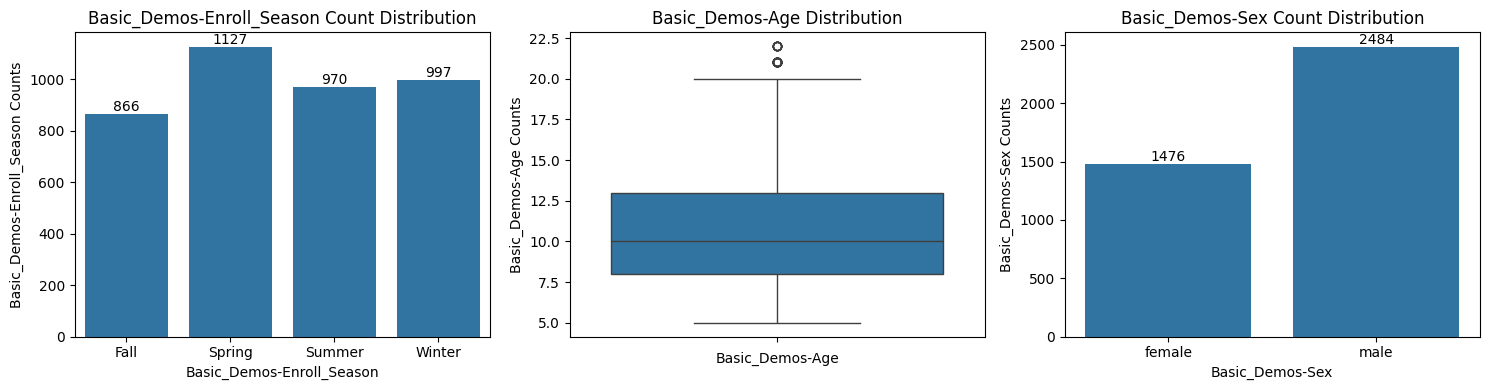

In [357]:
# Show EDA again after cleaning
basic_demos_train_df = train_df.loc[:, train_df.columns.map(lambda x: x.split(sep='-')[0]) == 'Basic_Demos']

print('-----------------------------Sample Data----------------------------')
print(basic_demos_train_df.head())
summarize_data(basic_demos_train_df)
generate_eda_plot(basic_demos_train_df)

## 2.2 Internet Use

-----------------------------Sample Data----------------------------
  PreInt_EduHx-Season  PreInt_EduHx-computerinternet_hoursday
0                Fall                                     3.0
1              Summer                                     0.0
2              Summer                                     2.0
3              Winter                                     0.0
4                 NaN                                     NaN

------------------------Type & Null Analysis------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3960 entries, 0 to 3959
Data columns (total 2 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   PreInt_EduHx-Season                     3540 non-null   object 
 1   PreInt_EduHx-computerinternet_hoursday  3301 non-null   float64
dtypes: float64(1), object(1)
memory usage: 62.0+ KB
None

------------------------Categorical Analysis----

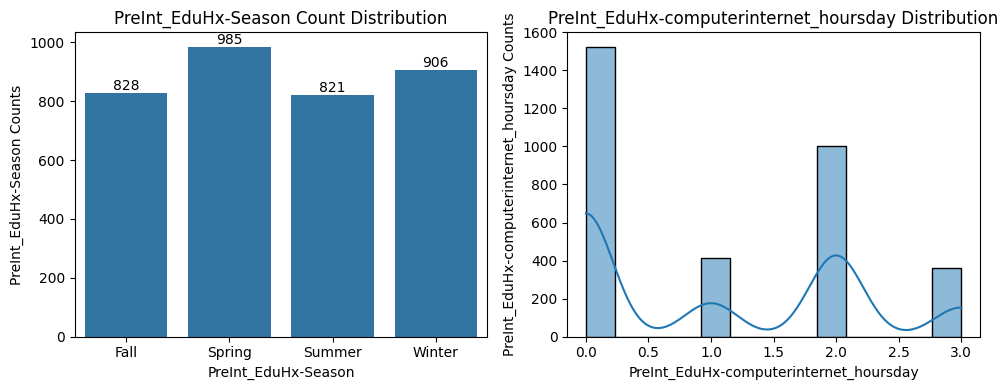

In [358]:
# Show EDA again after cleaning
internet_use_train_df = train_df.loc[:, train_df.columns.map(lambda x: x.split(sep='-')[0]) == 'PreInt_EduHx']

print('-----------------------------Sample Data----------------------------')
print(internet_use_train_df.head())
summarize_data(internet_use_train_df)
generate_eda_plot(internet_use_train_df)

## Observations ##
# 1. Null value in `PreInt_EduHx-computerinternet_hoursday`
# 2. Why `PreInt_EduHx-computerinternet_hoursday` is float64

In [359]:
# Impute `computerinternet_hoursday` with mode
train_df['PreInt_EduHx-computerinternet_hoursday'].fillna(value=train_df['PreInt_EduHx-computerinternet_hoursday'].mode()[0], inplace=True)

# Change `PreInt_EduHx-computerinternet_hoursday` to string
train_df['PreInt_EduHx-computerinternet_hoursday'] = train_df['PreInt_EduHx-computerinternet_hoursday'].astype('int').astype('str')

-----------------------------Sample Data----------------------------
  PreInt_EduHx-Season PreInt_EduHx-computerinternet_hoursday
0                Fall                                      3
1              Summer                                      0
2              Summer                                      2
3              Winter                                      0
4                 NaN                                      0

------------------------Type & Null Analysis------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3960 entries, 0 to 3959
Data columns (total 2 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   PreInt_EduHx-Season                     3540 non-null   object
 1   PreInt_EduHx-computerinternet_hoursday  3960 non-null   object
dtypes: object(2)
memory usage: 62.0+ KB
None

------------------------Categorical Analysis------------------------
 

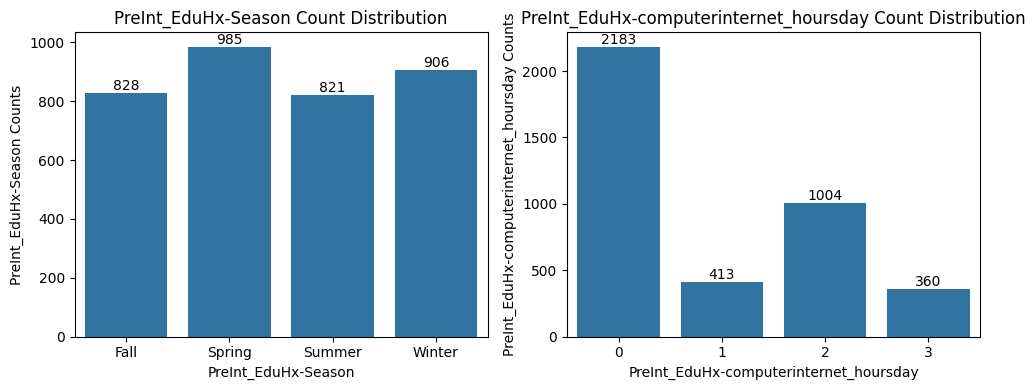

In [360]:
# Show EDA again after cleaning
internet_use_train_df = train_df.loc[:, train_df.columns.map(lambda x: x.split(sep='-')[0]) == 'PreInt_EduHx']

print('-----------------------------Sample Data----------------------------')
print(internet_use_train_df.head())
summarize_data(internet_use_train_df)
generate_eda_plot(internet_use_train_df)

## 2.3 Children's Global Assessment Scale

-----------------------------Sample Data----------------------------
  CGAS-Season  CGAS-CGAS_Score
0      Winter             51.0
1         NaN              NaN
2        Fall             71.0
3        Fall             71.0
4      Summer              NaN

------------------------Type & Null Analysis------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3960 entries, 0 to 3959
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CGAS-Season      2555 non-null   object 
 1   CGAS-CGAS_Score  2421 non-null   float64
dtypes: float64(1), object(1)
memory usage: 62.0+ KB
None

------------------------Categorical Analysis------------------------
       CGAS-Season
count         2555
unique           4
top         Spring
freq           697

-------------------------Numerical Analysis-------------------------
       CGAS-CGAS_Score
count          2421.00
mean             65.45
std              22.34


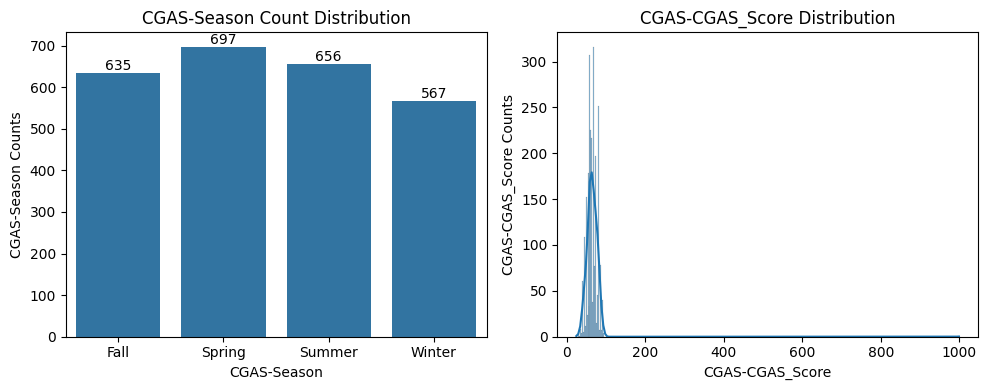

In [361]:
# Get the CGAS data
cgas_train_df = train_df.loc[:, train_df.columns.map(lambda x: x.split(sep='-')[0]) == 'CGAS']

print('-----------------------------Sample Data----------------------------')
print(cgas_train_df.head())
summarize_data(cgas_train_df)
generate_eda_plot(cgas_train_df)

## Observations ##
# 1. Remove 999.00 from CGAS-CGAS_Score
# 2. Impute CGAS-CGAS_Score with mean

In [362]:
# 1. Remove 999.00 from CGAS-CGAS_Score
train_df = train_df.loc[train_df['CGAS-CGAS_Score'] < 999, :]

# 2. Impute CGAS-CGAS_Score with mean
train_df['CGAS-CGAS_Score'] = train_df['CGAS-CGAS_Score'].fillna(value=train_df['CGAS-CGAS_Score'].mean())

-----------------------------Sample Data----------------------------
   CGAS-Season  CGAS-CGAS_Score
0       Winter             51.0
2         Fall             71.0
3         Fall             71.0
5       Winter             50.0
11      Summer             66.0

------------------------Type & Null Analysis------------------------
<class 'pandas.core.frame.DataFrame'>
Index: 2420 entries, 0 to 3958
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CGAS-Season      2420 non-null   object 
 1   CGAS-CGAS_Score  2420 non-null   float64
dtypes: float64(1), object(1)
memory usage: 56.7+ KB
None

------------------------Categorical Analysis------------------------
       CGAS-Season
count         2420
unique           4
top         Spring
freq           685

-------------------------Numerical Analysis-------------------------
       CGAS-CGAS_Score
count          2420.00
mean             65.07
std              11.79

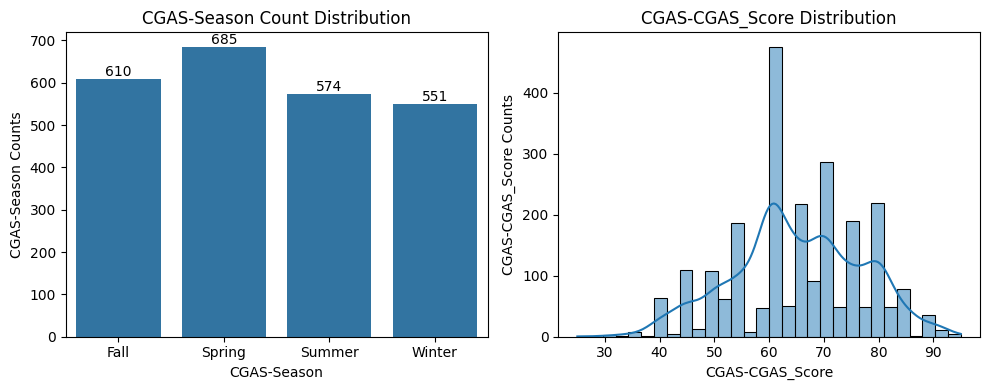

In [363]:
# Show EDA again
cgas_train_df = train_df.loc[:, train_df.columns.map(lambda x: x.split(sep='-')[0]) == 'CGAS']

print('-----------------------------Sample Data----------------------------')
print(cgas_train_df.head())
summarize_data(cgas_train_df)
generate_eda_plot(cgas_train_df)

## 2.4 Physical Measures

-----------------------------Sample Data----------------------------
   Physical-Season  Physical-BMI  Physical-Height  Physical-Weight  \
0             Fall     16.877316             46.0             50.8   
2             Fall     16.648696             56.5             75.6   
3           Summer     18.292347             56.0             81.6   
5           Summer     22.279952             59.5            112.2   
11             NaN           NaN              NaN              NaN   

    Physical-Waist_Circumference  Physical-Diastolic_BP  Physical-HeartRate  \
0                            NaN                    NaN                 NaN   
2                            NaN                   65.0                94.0   
3                            NaN                   60.0                97.0   
5                            NaN                   60.0                73.0   
11                           NaN                    NaN                 NaN   

    Physical-Systolic_BP  
0       

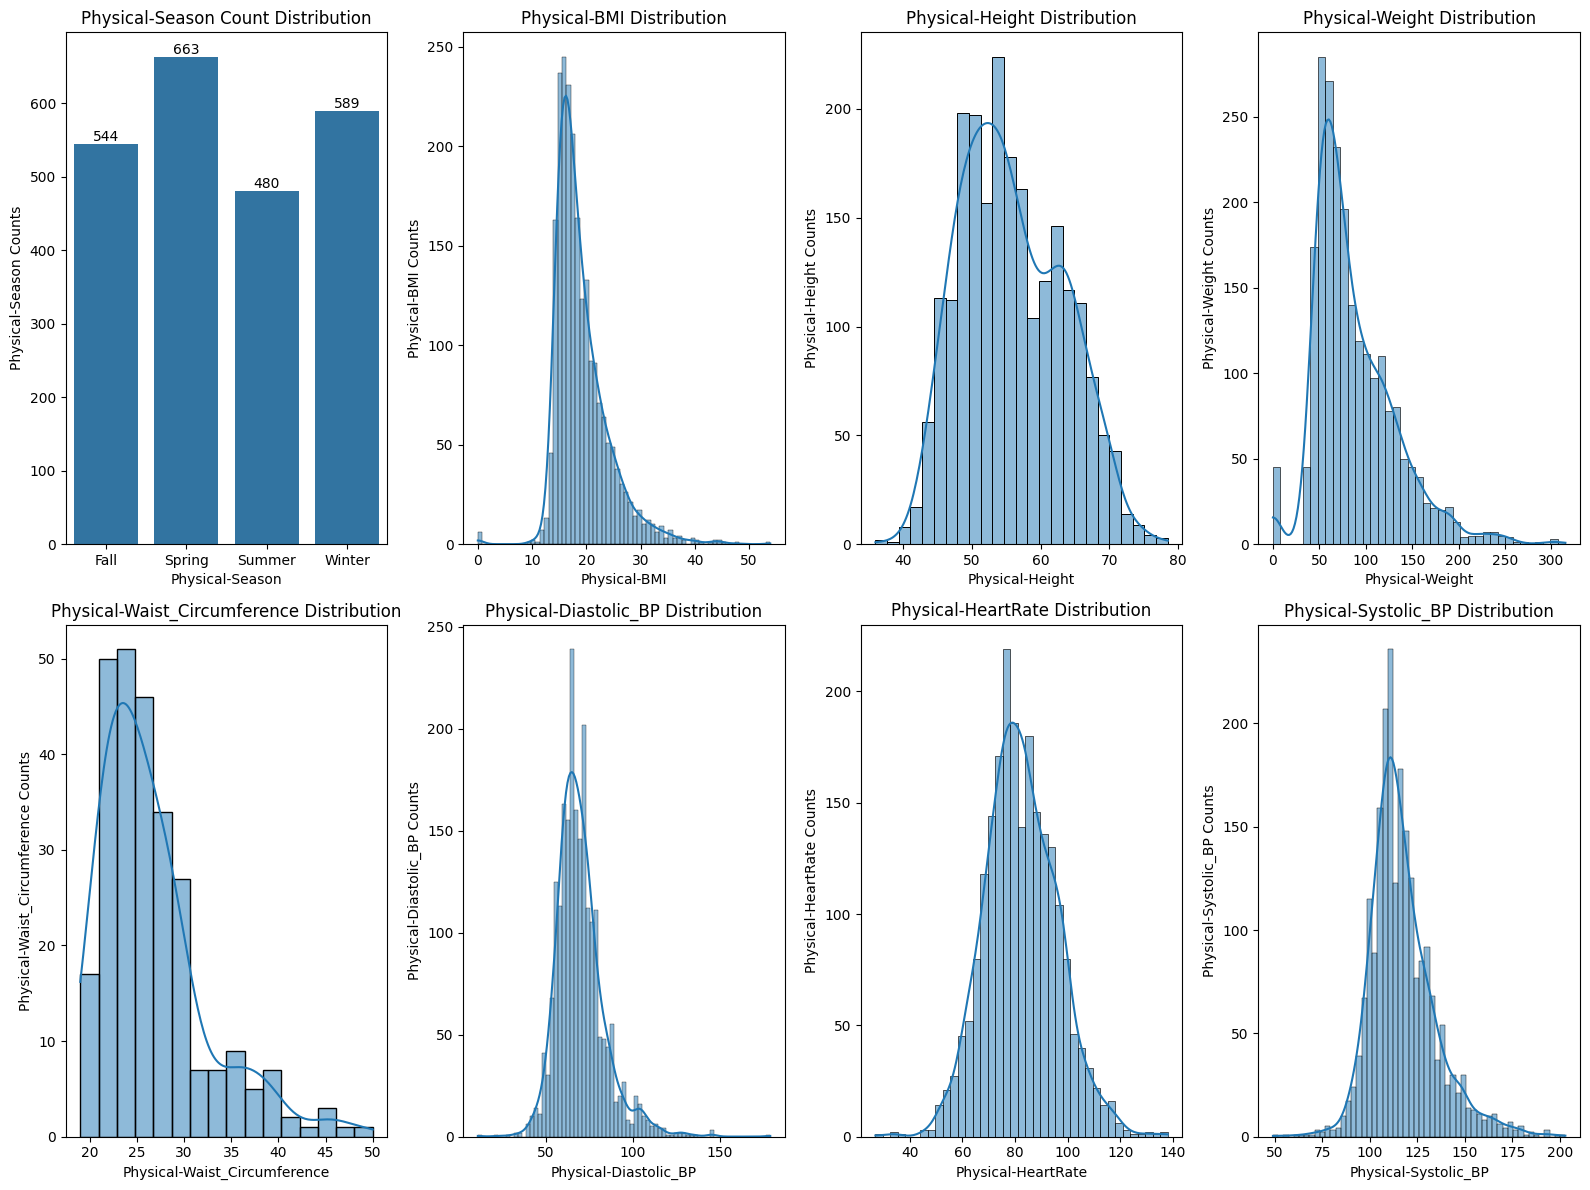

In [364]:
# Get the physical data
physical_train_df = train_df.loc[:, train_df.columns.map(lambda x: x.split(sep='-')[0]) == 'Physical']

print('-----------------------------Sample Data----------------------------')
print(physical_train_df.head())
summarize_data(physical_train_df)
generate_eda_plot(physical_train_df)

## 2.5 FitnessGram Vitals and Treadmill

-----------------------------Sample Data----------------------------
   Fitness_Endurance-Season  Fitness_Endurance-Max_Stage  \
0                       NaN                          NaN   
2                      Fall                          5.0   
3                    Summer                          6.0   
5                       NaN                          NaN   
11                      NaN                          NaN   

    Fitness_Endurance-Time_Mins  Fitness_Endurance-Time_Sec  
0                           NaN                         NaN  
2                           7.0                        33.0  
3                           9.0                        37.0  
5                           NaN                         NaN  
11                          NaN                         NaN  

------------------------Type & Null Analysis------------------------
<class 'pandas.core.frame.DataFrame'>
Index: 2420 entries, 0 to 3958
Data columns (total 4 columns):
 #   Column                

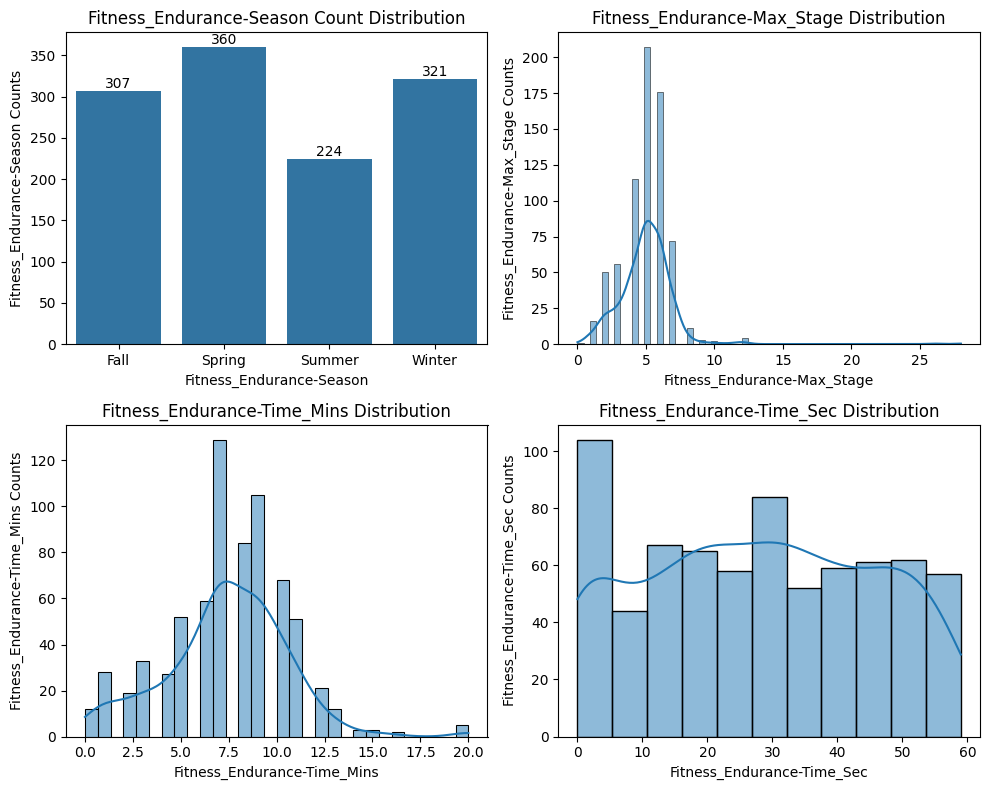

In [365]:
# Get the fitness data
fitness_vital_train_df = train_df.loc[:, train_df.columns.map(lambda x: x.split(sep='-')[0]) == 'Fitness_Endurance']

print('-----------------------------Sample Data----------------------------')
print(fitness_vital_train_df.head())
summarize_data(fitness_vital_train_df)
generate_eda_plot(fitness_vital_train_df)

In [366]:
# Cast `Max_Stage` and `Fitness_Endurance-Time_Mins` to str
# train_df['Fitness_Endurance-Max_Stage'] = train_df['Fitness_Endurance-Max_Stage'].astype('Int64')
# train_df['Fitness_Endurance-Time_Mins'] = train_df['Fitness_Endurance-Time_Mins'].astype('Int64')
# train_df['Fitness_Endurance-Time_Sec'] = train_df['Fitness_Endurance-Time_Sec'].astype('Int64')

-----------------------------Sample Data----------------------------
   Fitness_Endurance-Season  Fitness_Endurance-Max_Stage  \
0                       NaN                          NaN   
2                      Fall                          5.0   
3                    Summer                          6.0   
5                       NaN                          NaN   
11                      NaN                          NaN   

    Fitness_Endurance-Time_Mins  Fitness_Endurance-Time_Sec  
0                           NaN                         NaN  
2                           7.0                        33.0  
3                           9.0                        37.0  
5                           NaN                         NaN  
11                          NaN                         NaN  

------------------------Type & Null Analysis------------------------
<class 'pandas.core.frame.DataFrame'>
Index: 2420 entries, 0 to 3958
Data columns (total 4 columns):
 #   Column                

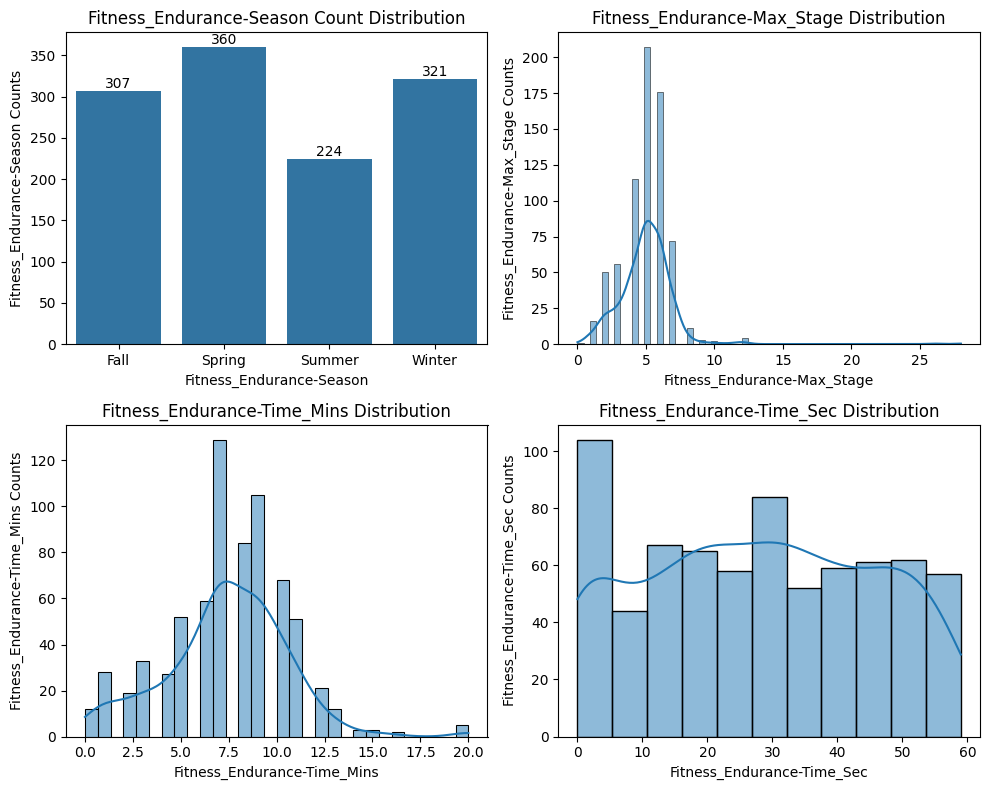

In [367]:
fitness_vital_train_df = train_df.loc[:, train_df.columns.map(lambda x: x.split(sep='-')[0]) == 'Fitness_Endurance']

print('-----------------------------Sample Data----------------------------')
print(fitness_vital_train_df.head())
summarize_data(fitness_vital_train_df)
generate_eda_plot(fitness_vital_train_df)

## 2.6 FitnessGram Child

-----------------------------Sample Data----------------------------
   FGC-Season  FGC-FGC_CU  FGC-FGC_CU_Zone  FGC-FGC_GSND  FGC-FGC_GSND_Zone  \
0        Fall         0.0              0.0           NaN                NaN   
2        Fall        20.0              1.0          10.2                1.0   
3      Summer        18.0              1.0           NaN                NaN   
5      Summer        12.0              0.0          16.5                2.0   
11     Winter         NaN              NaN           NaN                NaN   

    FGC-FGC_GSD  FGC-FGC_GSD_Zone  FGC-FGC_PU  FGC-FGC_PU_Zone  FGC-FGC_SRL  \
0           NaN               NaN         0.0              0.0          7.0   
2          14.7               2.0         7.0              1.0         10.0   
3           NaN               NaN         5.0              0.0          7.0   
5          17.9               2.0         6.0              0.0         10.0   
11          NaN               NaN         NaN              Na

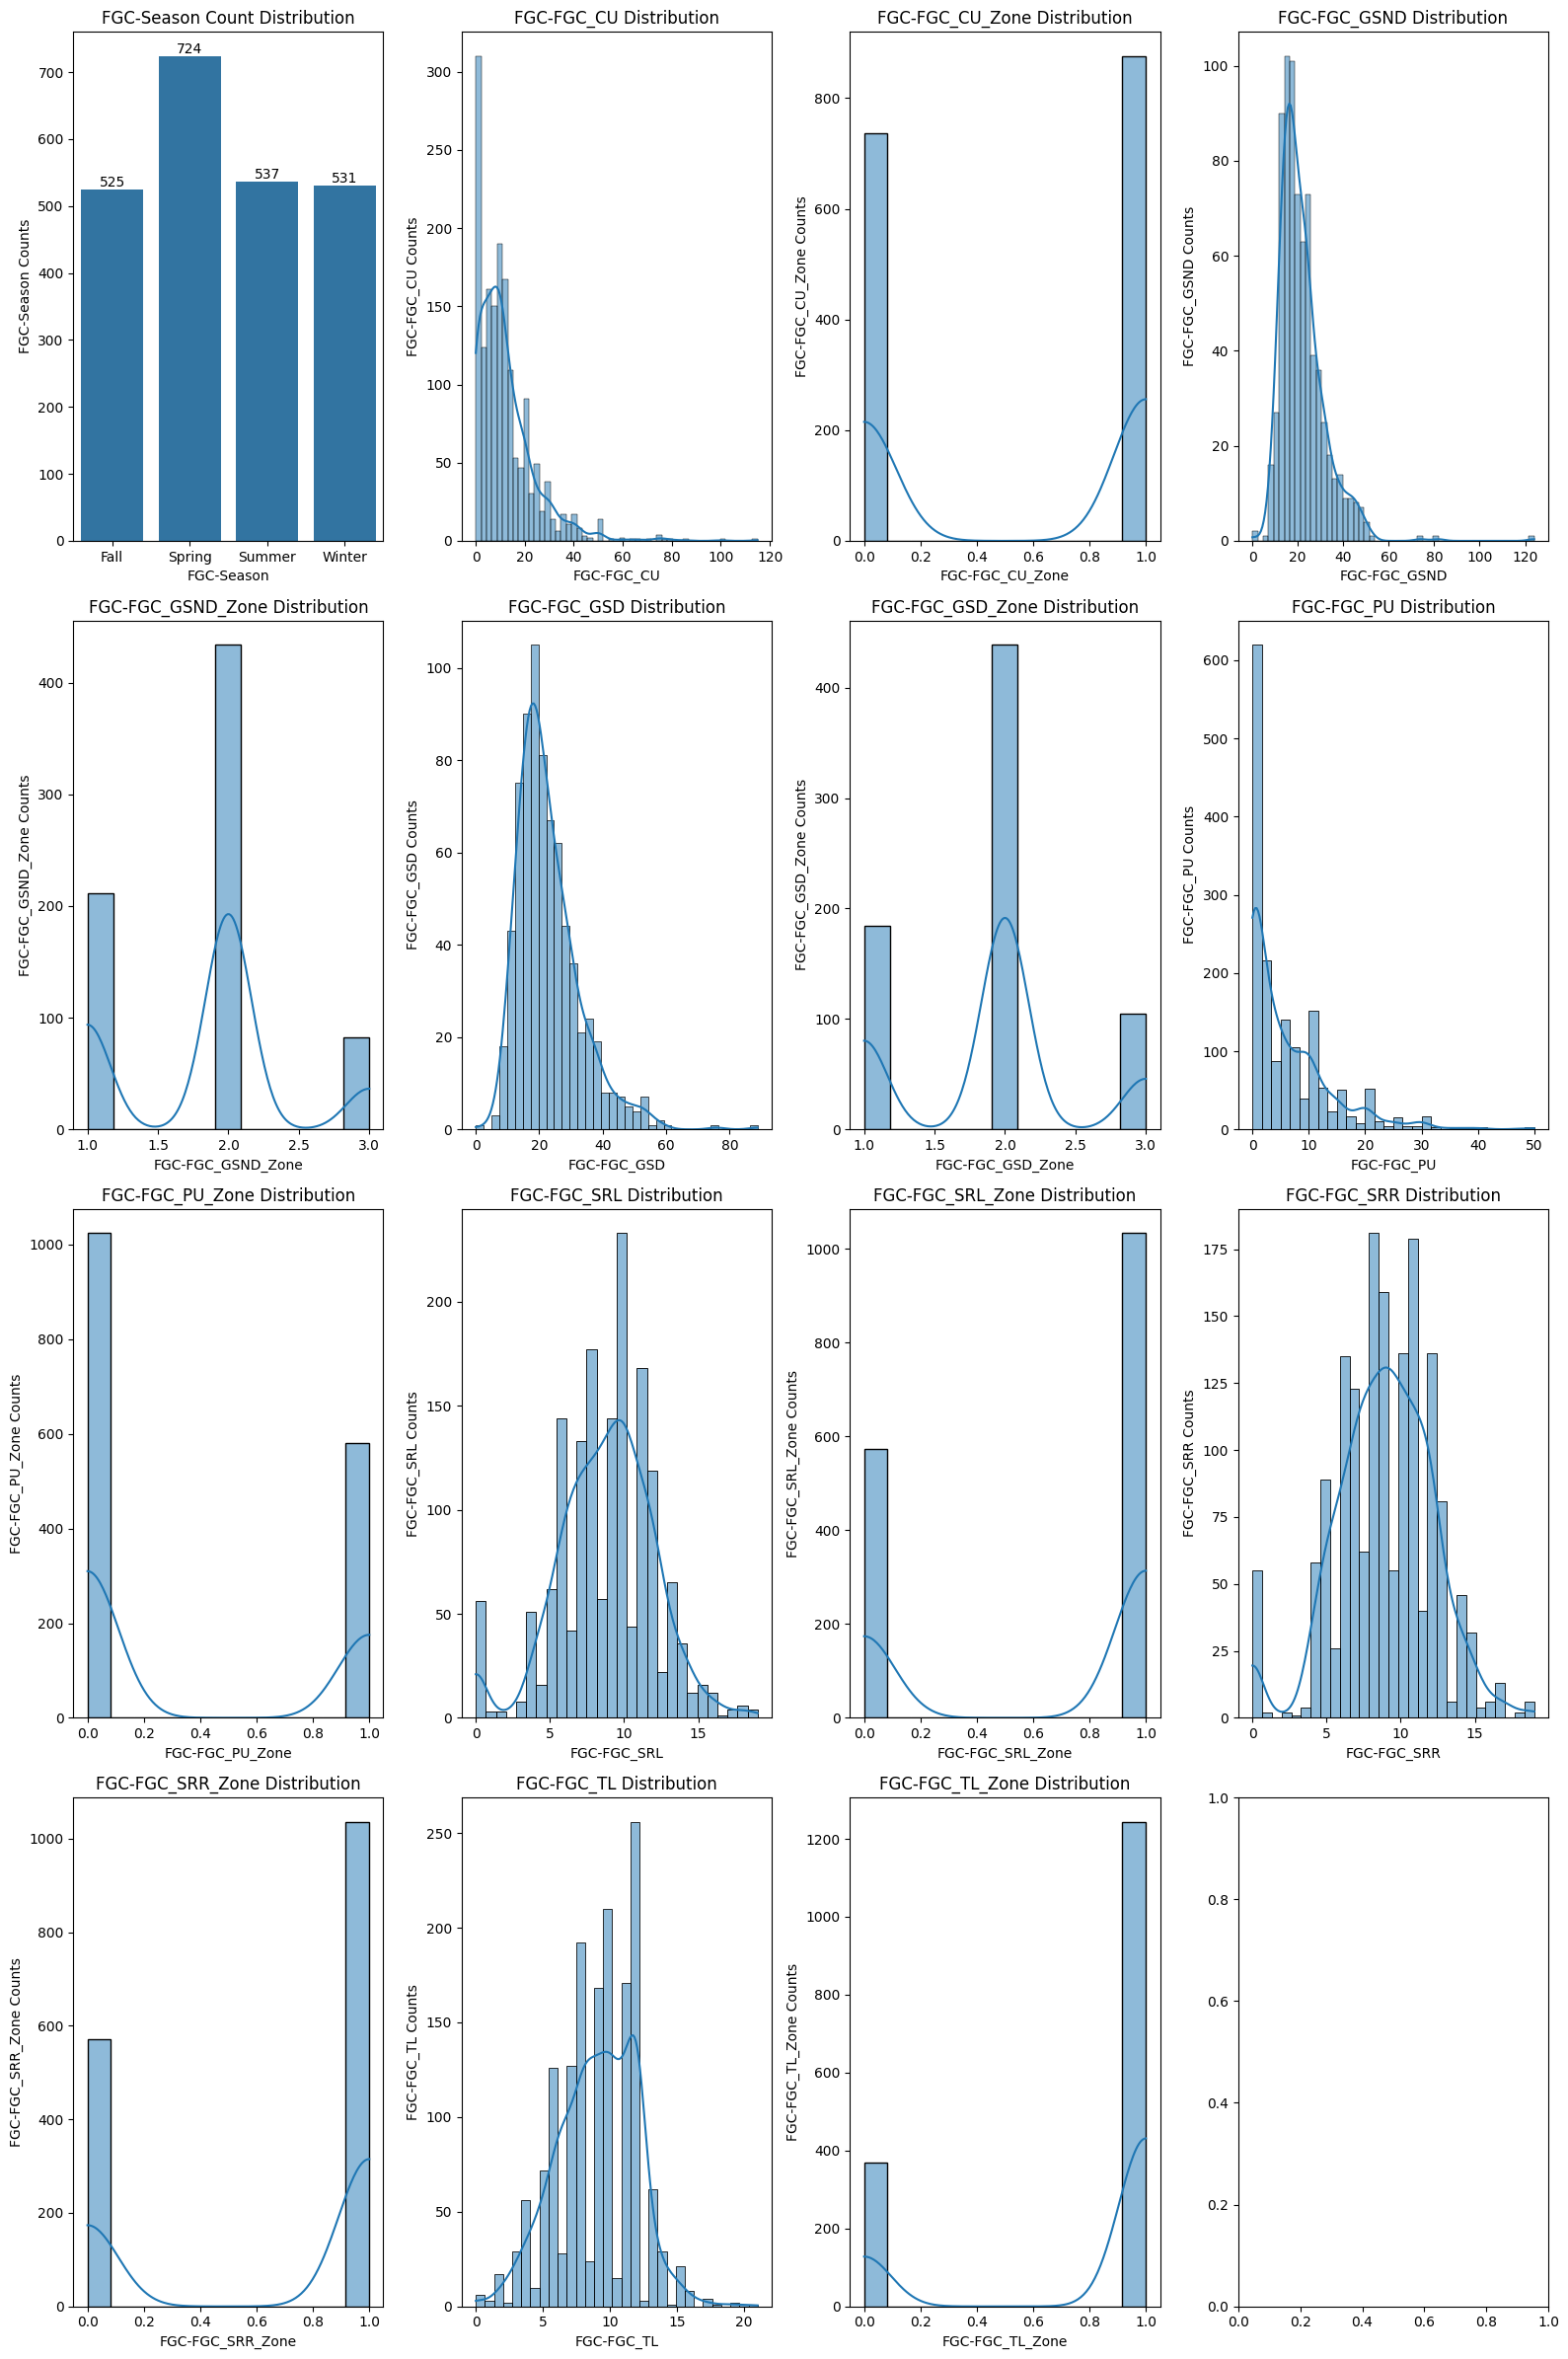

In [368]:
# Get the fitness data
fitness_child_train_df = train_df.loc[:, train_df.columns.map(lambda x: x.split(sep='-')[0]) == 'FGC']

print('-----------------------------Sample Data----------------------------')
print(fitness_child_train_df.head())
summarize_data(fitness_child_train_df)
generate_eda_plot(fitness_child_train_df)

In [369]:
train_df['FGC-FGC_CU_Zone'] = train_df['FGC-FGC_CU_Zone'].astype('str')
train_df['FGC-FGC_GSND_Zone'] = train_df['FGC-FGC_GSND_Zone'].astype('str')
train_df['FGC-FGC_GSD_Zone'] = train_df['FGC-FGC_GSD_Zone'].astype('str')
train_df['FGC-FGC_PU_Zone'] = train_df['FGC-FGC_PU_Zone'].astype('str')
train_df['FGC-FGC_SRL_Zone'] = train_df['FGC-FGC_SRL_Zone'].astype('str')
train_df['FGC-FGC_SRR_Zone'] = train_df['FGC-FGC_SRR_Zone'].astype('str')
train_df['FGC-FGC_TL_Zone'] = train_df['FGC-FGC_TL_Zone'].astype('str')

-----------------------------Sample Data----------------------------
   FGC-Season  FGC-FGC_CU FGC-FGC_CU_Zone  FGC-FGC_GSND FGC-FGC_GSND_Zone  \
0        Fall         0.0             0.0           NaN               nan   
2        Fall        20.0             1.0          10.2               1.0   
3      Summer        18.0             1.0           NaN               nan   
5      Summer        12.0             0.0          16.5               2.0   
11     Winter         NaN             nan           NaN               nan   

    FGC-FGC_GSD FGC-FGC_GSD_Zone  FGC-FGC_PU FGC-FGC_PU_Zone  FGC-FGC_SRL  \
0           NaN              nan         0.0             0.0          7.0   
2          14.7              2.0         7.0             1.0         10.0   
3           NaN              nan         5.0             0.0          7.0   
5          17.9              2.0         6.0             0.0         10.0   
11          NaN              nan         NaN             nan          NaN   

   FG

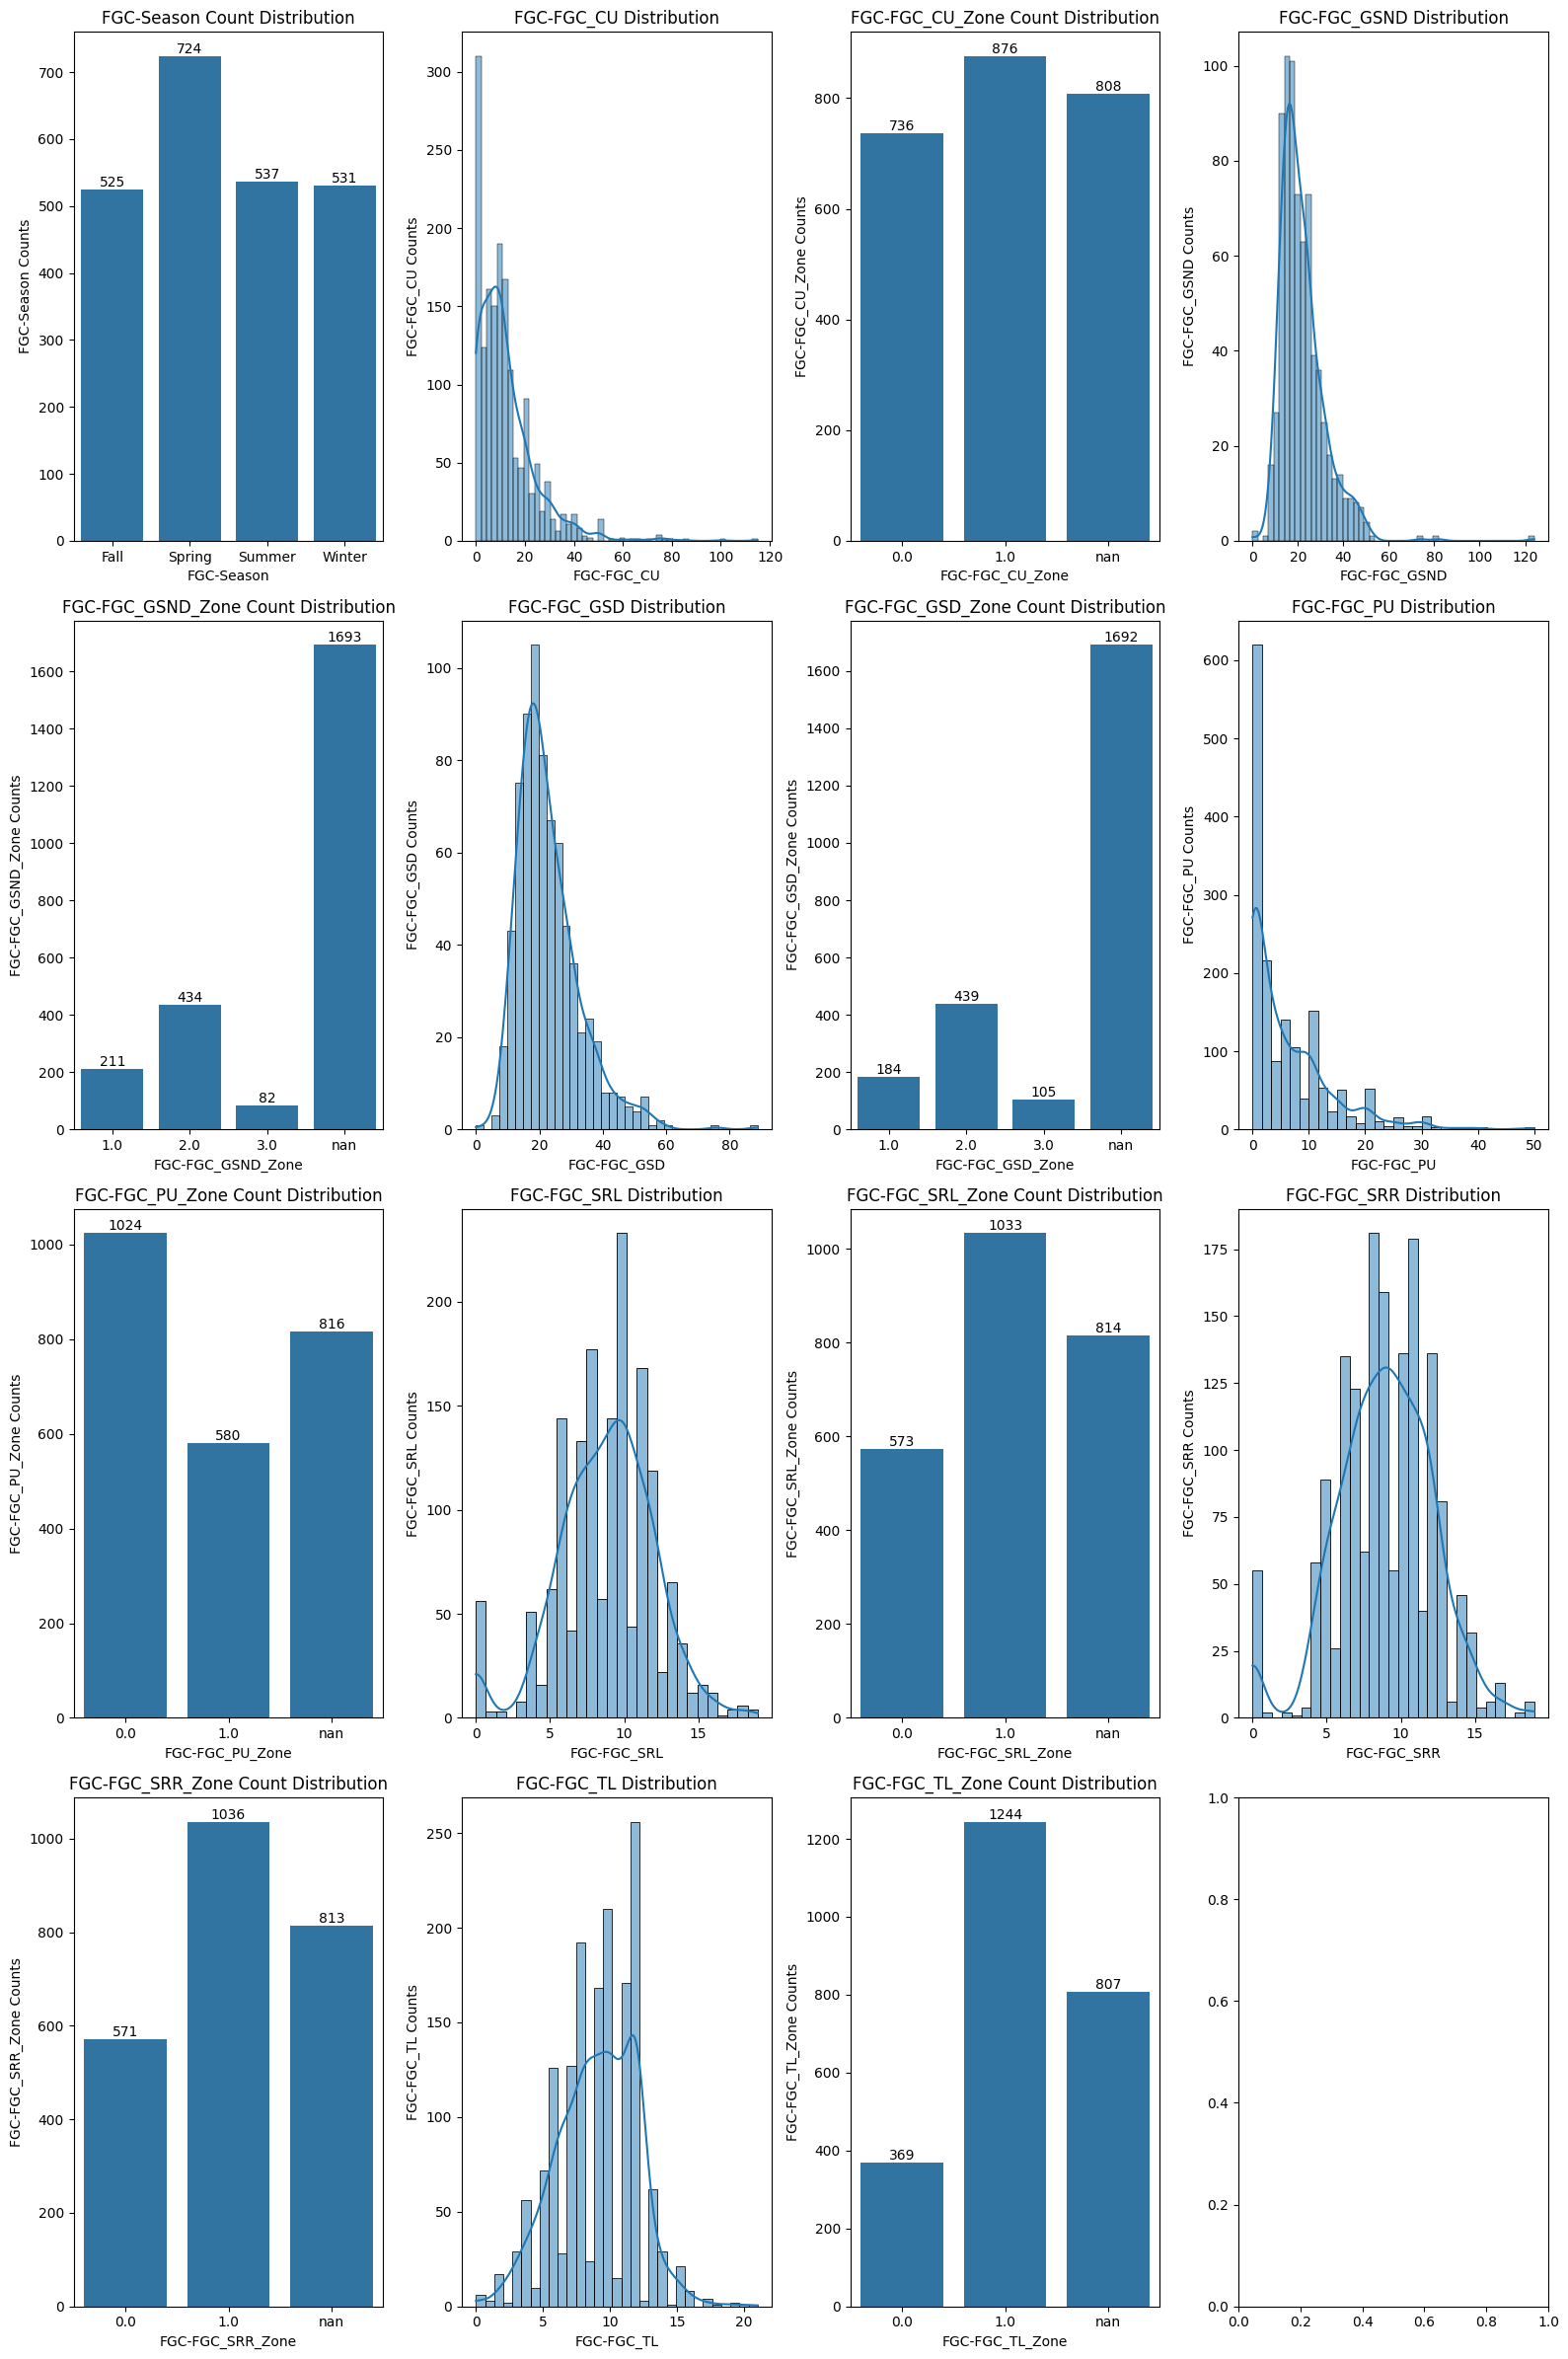

In [370]:
# Get the fitness data
fitness_child_train_df = train_df.loc[:, train_df.columns.map(lambda x: x.split(sep='-')[0]) == 'FGC']

print('-----------------------------Sample Data----------------------------')
print(fitness_child_train_df.head())
summarize_data(fitness_child_train_df)
generate_eda_plot(fitness_child_train_df)

## 2.7 Bio-electric Impedance Analysis

-----------------------------Sample Data----------------------------
   BIA-Season  BIA-BIA_Activity_Level_num  BIA-BIA_BMC  BIA-BIA_BMI  \
0        Fall                         2.0      2.66855      16.8792   
2         NaN                         NaN          NaN          NaN   
3      Summer                         3.0      3.84191      18.2943   
5      Summer                         2.0      4.33036      30.1865   
11        NaN                         NaN          NaN          NaN   

    BIA-BIA_BMR  BIA-BIA_DEE  BIA-BIA_ECW  BIA-BIA_FFM  BIA-BIA_FFMI  \
0       932.498      1492.00      8.25598      41.5862       13.8177   
2           NaN          NaN          NaN          NaN           NaN   
3      1131.430      1923.44     15.59250      62.7757       14.0740   
5      1330.970      1996.45     30.21240      84.0285       16.6877   
11          NaN          NaN          NaN          NaN           NaN   

    BIA-BIA_FMI  BIA-BIA_Fat  BIA-BIA_Frame_num  BIA-BIA_ICW  BIA-BIA_L

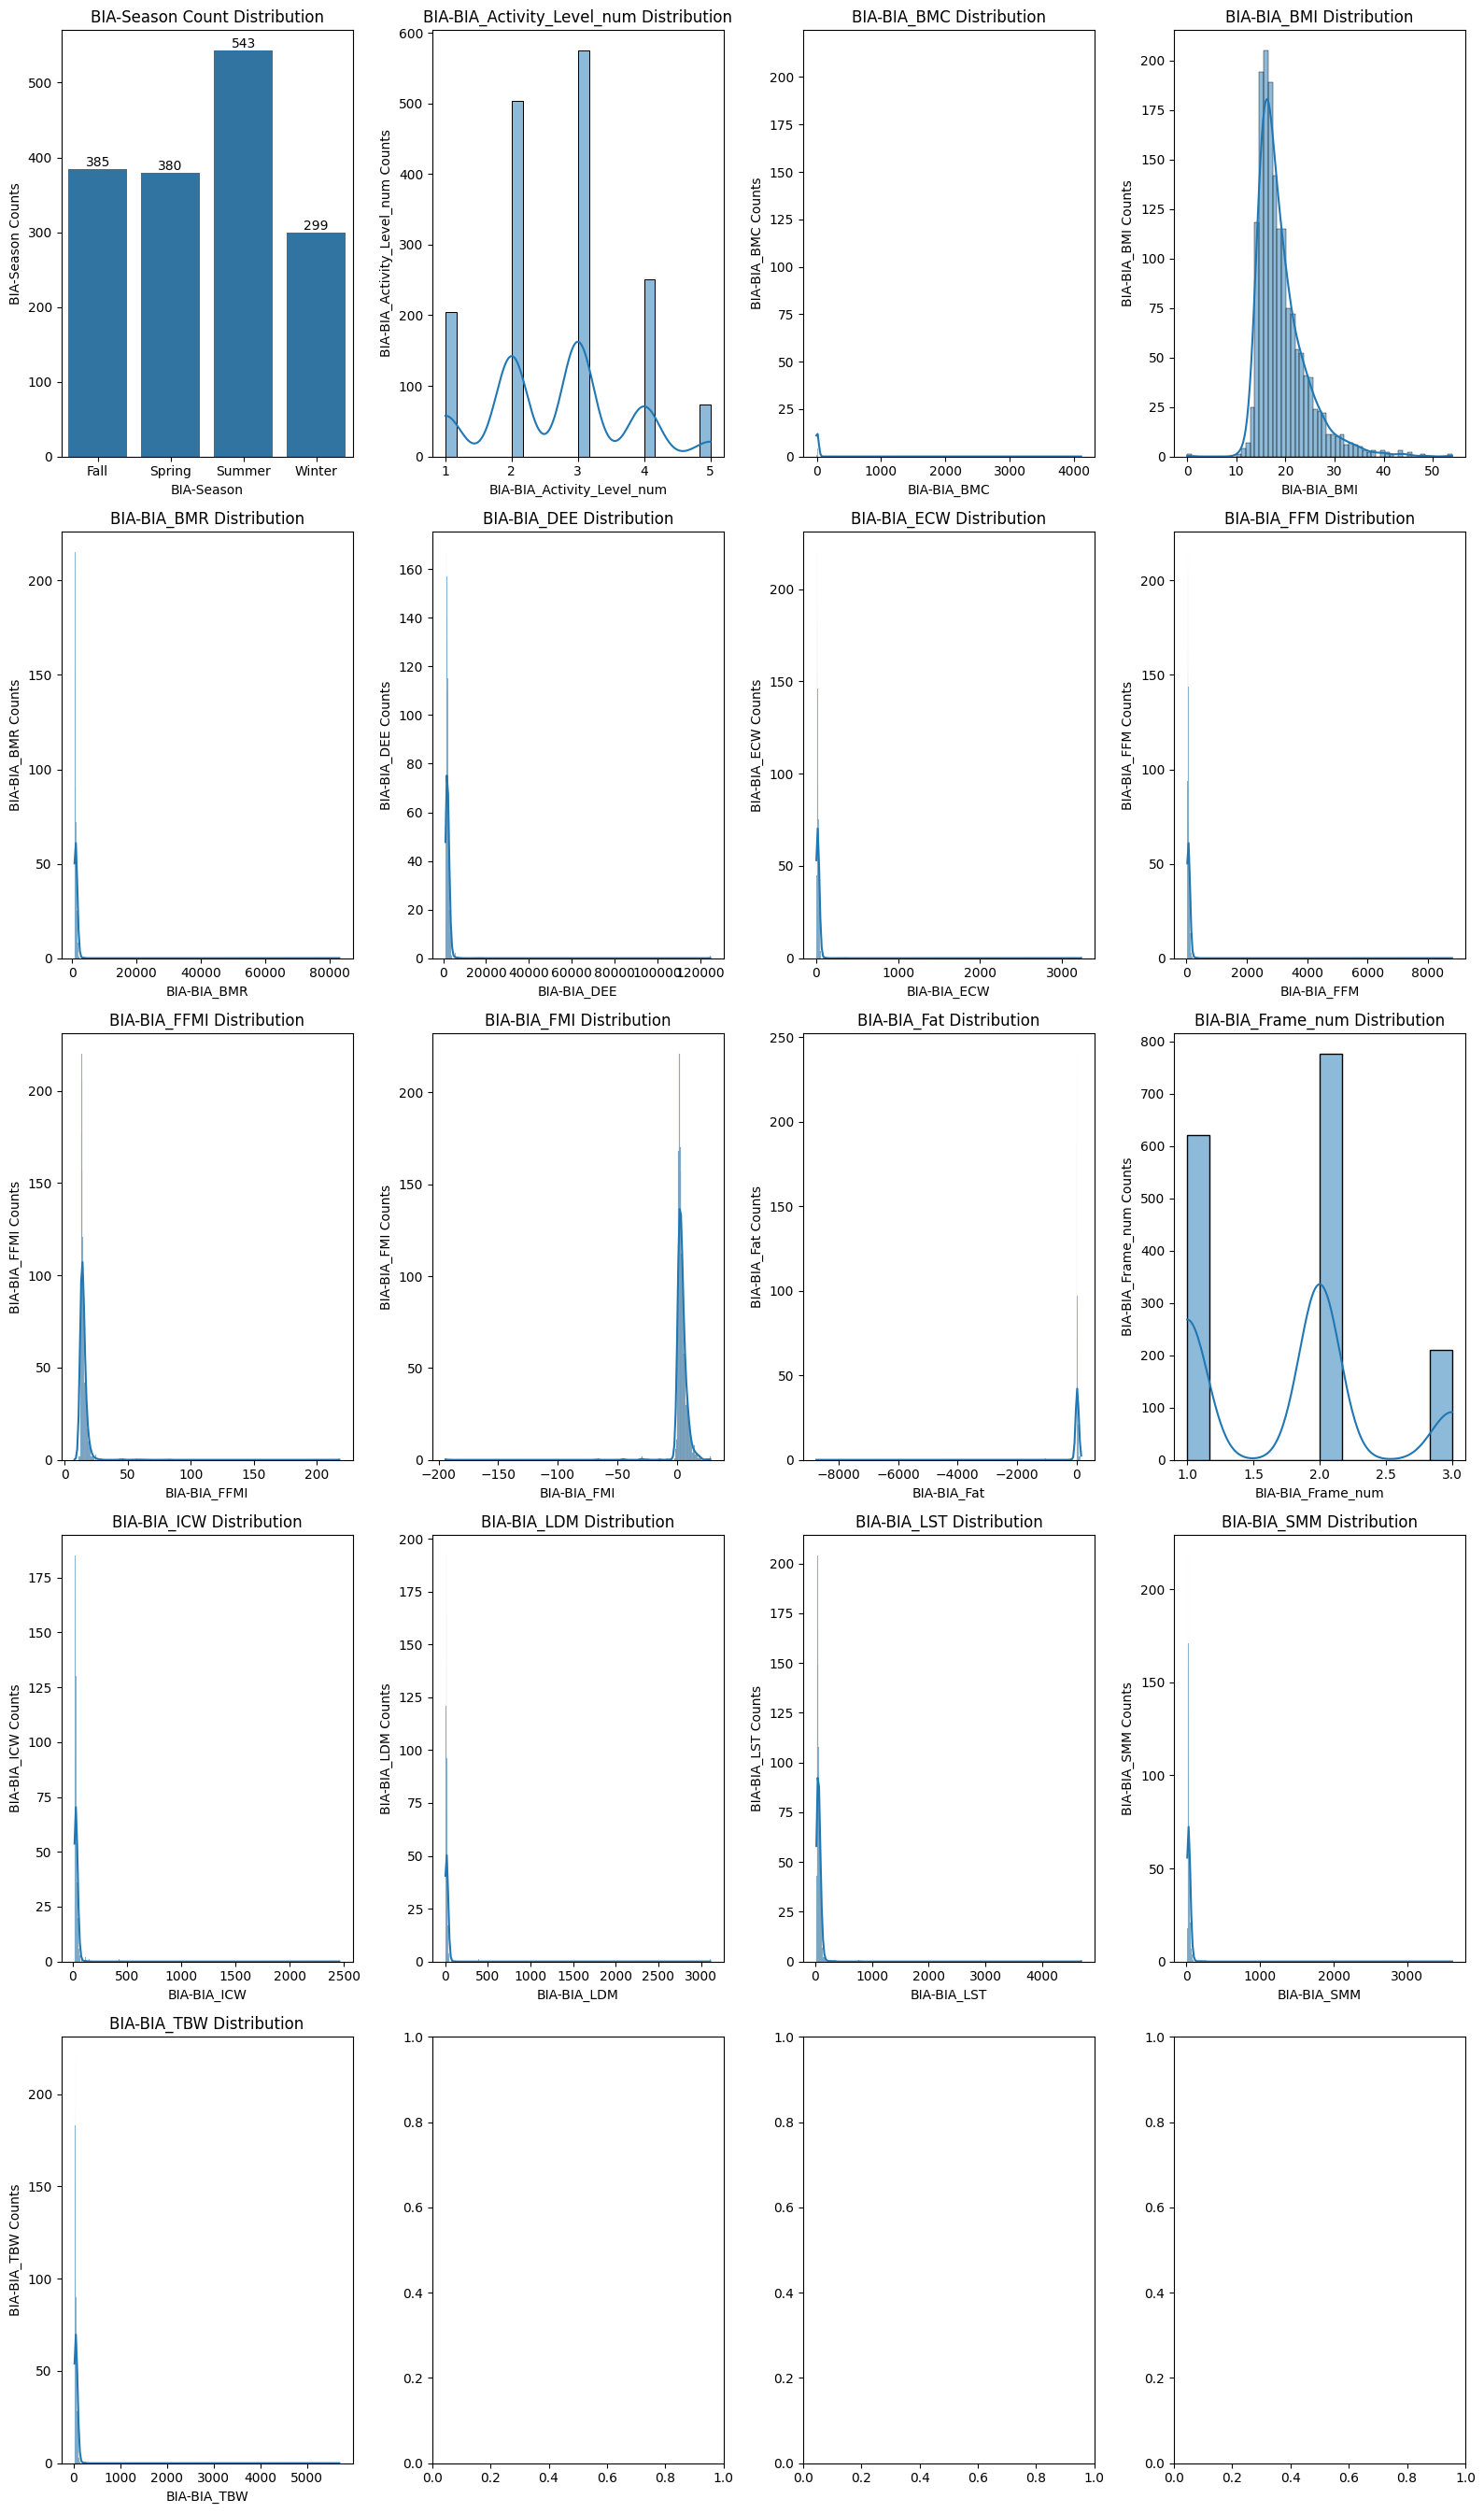

In [371]:
# Get the fitness data
bia_train_df = train_df.loc[:, train_df.columns.map(lambda x: x.split(sep='-')[0]) == 'BIA']

print('-----------------------------Sample Data----------------------------')
print(bia_train_df.head())
summarize_data(bia_train_df)
generate_eda_plot(bia_train_df)

## 2.8 Physical Activity Questionnaire

-----------------------------Sample Data----------------------------
   PAQ_A-Season  PAQ_A-PAQ_A_Total PAQ_C-Season  PAQ_C-PAQ_C_Total
0           NaN                NaN          NaN                NaN
2           NaN                NaN       Summer              2.170
3           NaN                NaN       Winter              2.451
5           NaN                NaN       Spring              4.110
11          NaN                NaN       Winter              1.100

------------------------Type & Null Analysis------------------------
<class 'pandas.core.frame.DataFrame'>
Index: 2420 entries, 0 to 3958
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   PAQ_A-Season       302 non-null    object 
 1   PAQ_A-PAQ_A_Total  302 non-null    float64
 2   PAQ_C-Season       1266 non-null   object 
 3   PAQ_C-PAQ_C_Total  1266 non-null   float64
dtypes: float64(2), object(2)
memory usage: 94.5+ KB
None

-----------

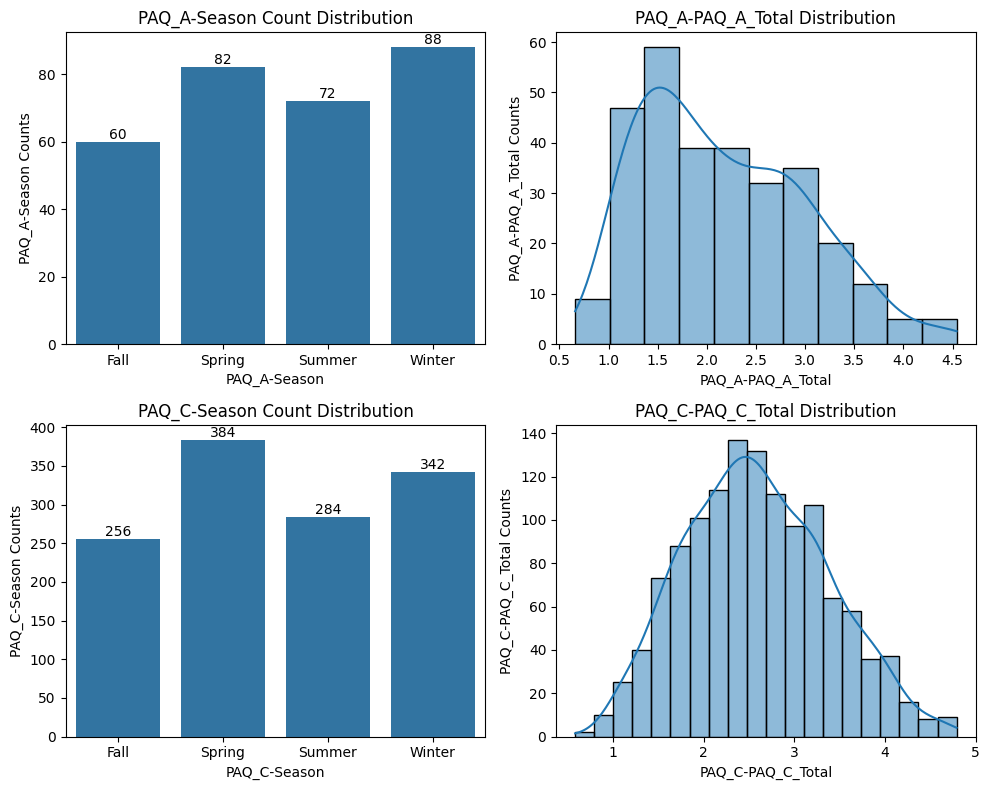

In [372]:
# Get the fitness data
paq_train_df = train_df.loc[:, train_df.columns.map(lambda x: x.split(sep='-')[0][:3]) == 'PAQ']

print('-----------------------------Sample Data----------------------------')
print(paq_train_df.head())
summarize_data(paq_train_df)
generate_eda_plot(paq_train_df)

## 2.9 Sleep Disturbance Scale

-----------------------------Sample Data----------------------------
   PCIAT-Season  PCIAT-PCIAT_01  PCIAT-PCIAT_02  PCIAT-PCIAT_03  \
0          Fall             5.0             4.0             4.0   
2          Fall             5.0             2.0             2.0   
3        Summer             4.0             2.0             4.0   
5        Summer             3.0             3.0             3.0   
11       Winter             2.0             2.0             1.0   

    PCIAT-PCIAT_04  PCIAT-PCIAT_05  PCIAT-PCIAT_06  PCIAT-PCIAT_07  \
0              0.0             4.0             0.0             0.0   
2              1.0             2.0             1.0             1.0   
3              0.0             5.0             1.0             0.0   
5              0.0             2.0             1.0             0.0   
11             0.0             3.0             0.0             0.0   

    PCIAT-PCIAT_08  PCIAT-PCIAT_09  PCIAT-PCIAT_10  PCIAT-PCIAT_11  \
0              4.0             0.0   

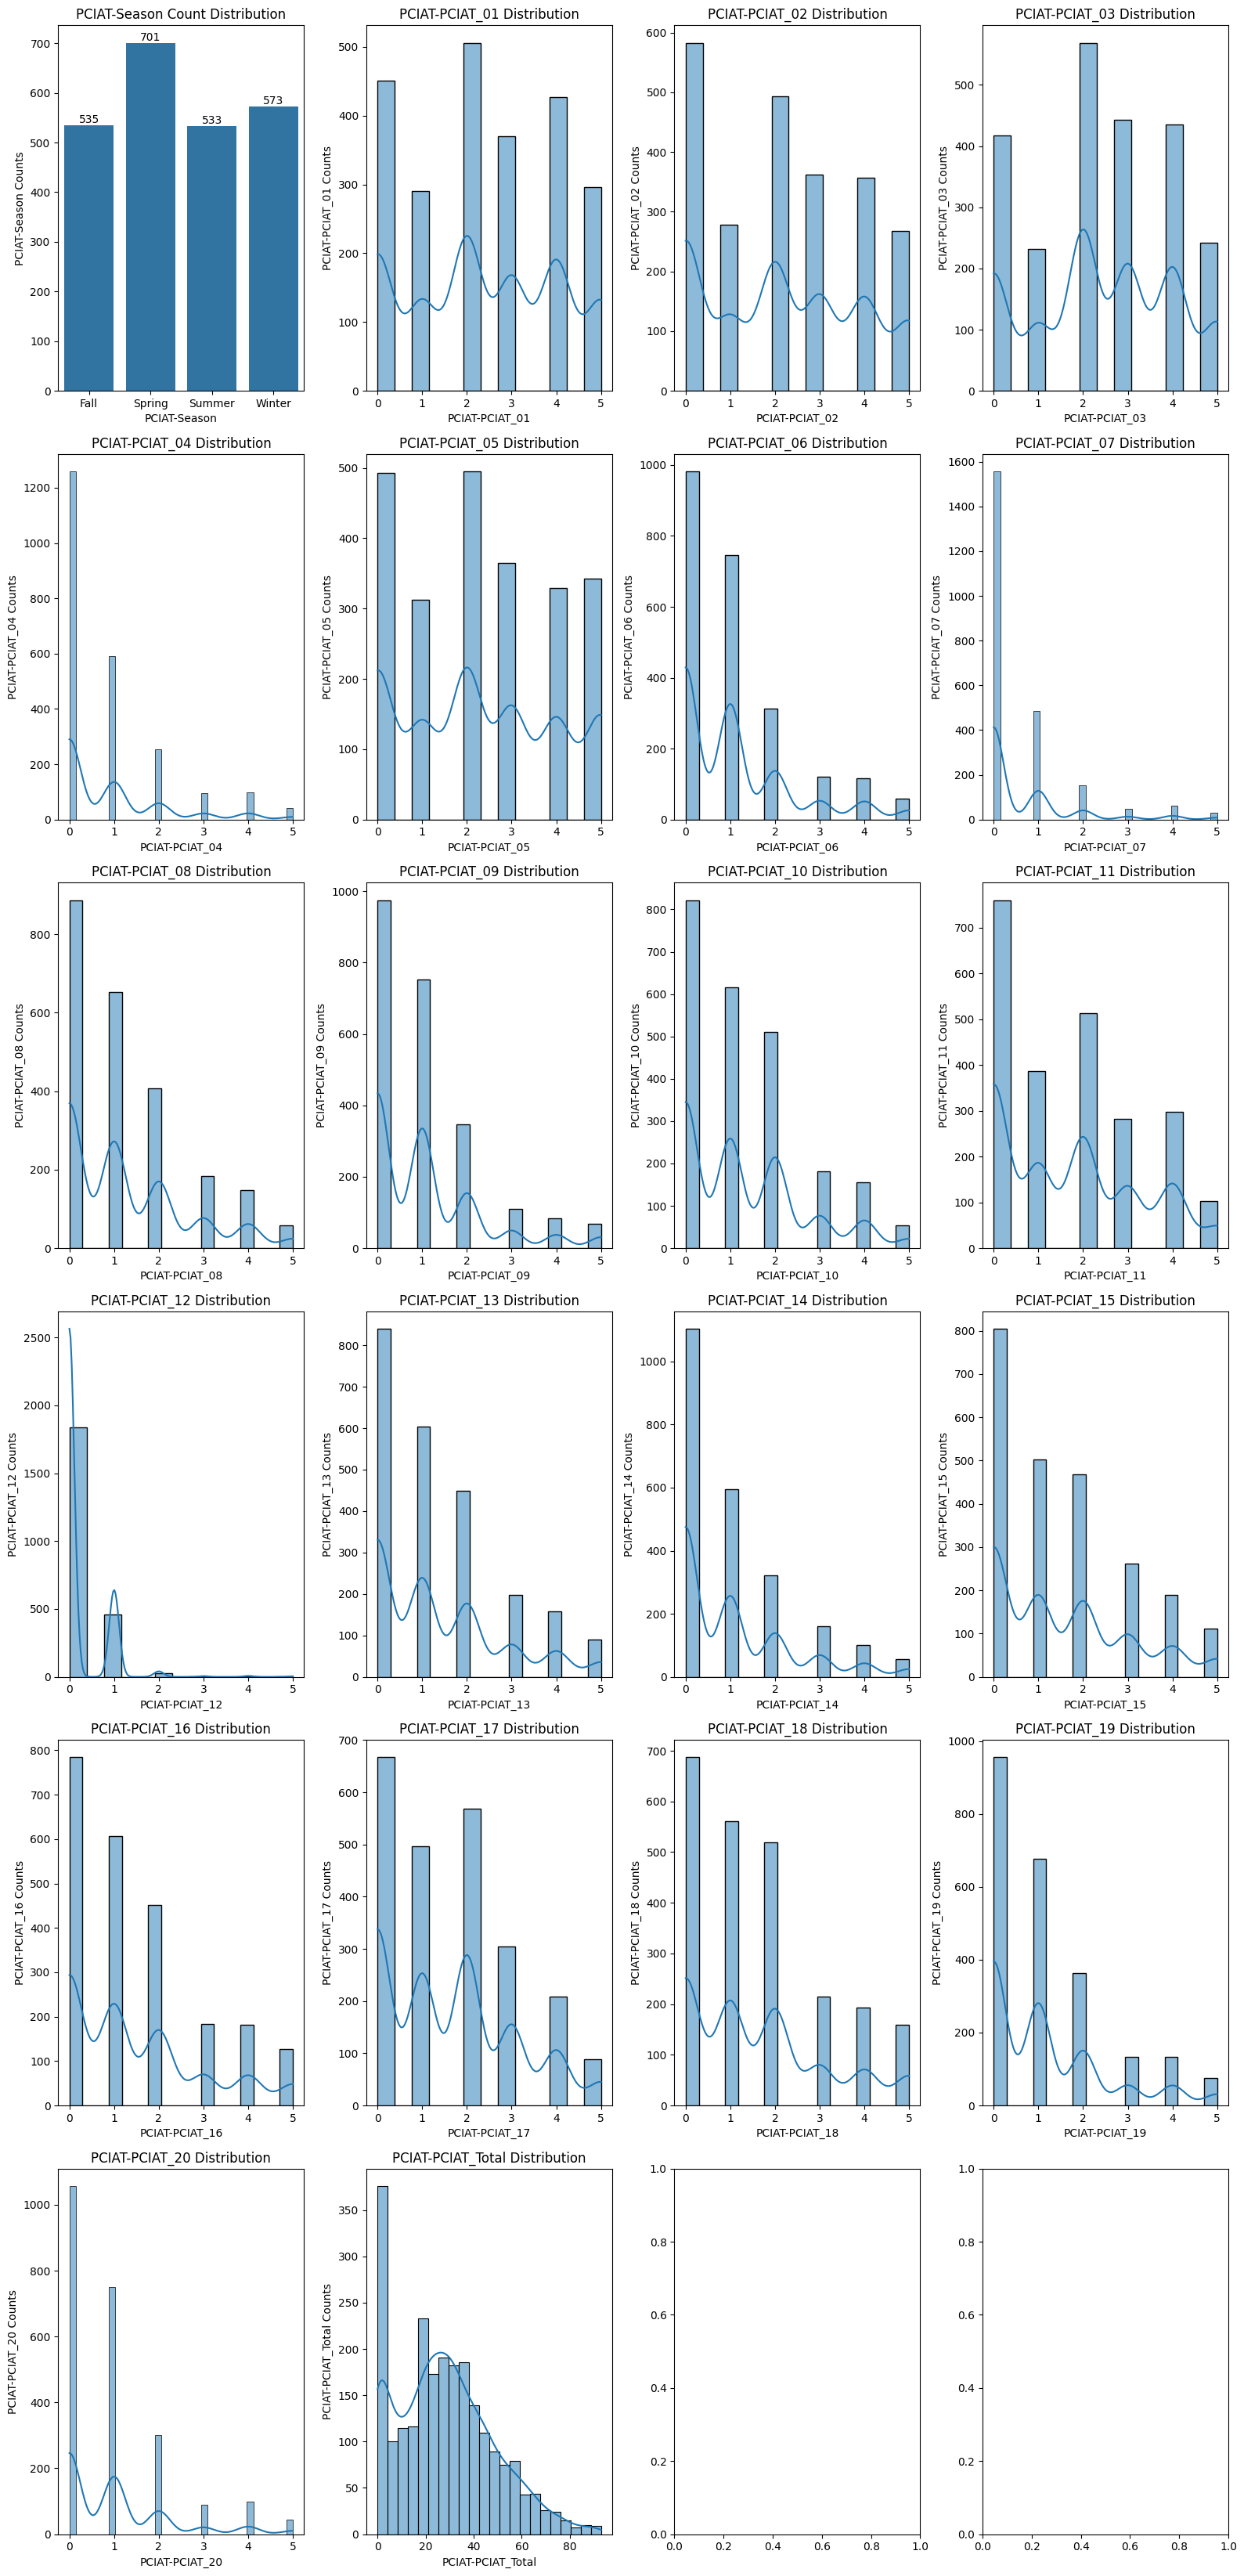

In [373]:
# Get the fitness data
pciat_train_df = train_df.loc[:, train_df.columns.map(lambda x: x.split(sep='-')[0]) == 'PCIAT']

print('-----------------------------Sample Data----------------------------')
print(pciat_train_df.head())
summarize_data(pciat_train_df)
generate_eda_plot(pciat_train_df)

## 2.10 Actigraphy

-----------------------------Sample Data----------------------------
   BIA-Season  BIA-BIA_Activity_Level_num  BIA-BIA_BMC  BIA-BIA_BMI  \
0        Fall                         2.0      2.66855      16.8792   
2         NaN                         NaN          NaN          NaN   
3      Summer                         3.0      3.84191      18.2943   
5      Summer                         2.0      4.33036      30.1865   
11        NaN                         NaN          NaN          NaN   

    BIA-BIA_BMR  BIA-BIA_DEE  BIA-BIA_ECW  BIA-BIA_FFM  BIA-BIA_FFMI  \
0       932.498      1492.00      8.25598      41.5862       13.8177   
2           NaN          NaN          NaN          NaN           NaN   
3      1131.430      1923.44     15.59250      62.7757       14.0740   
5      1330.970      1996.45     30.21240      84.0285       16.6877   
11          NaN          NaN          NaN          NaN           NaN   

    BIA-BIA_FMI  BIA-BIA_Fat  BIA-BIA_Frame_num  BIA-BIA_ICW  BIA-BIA_L

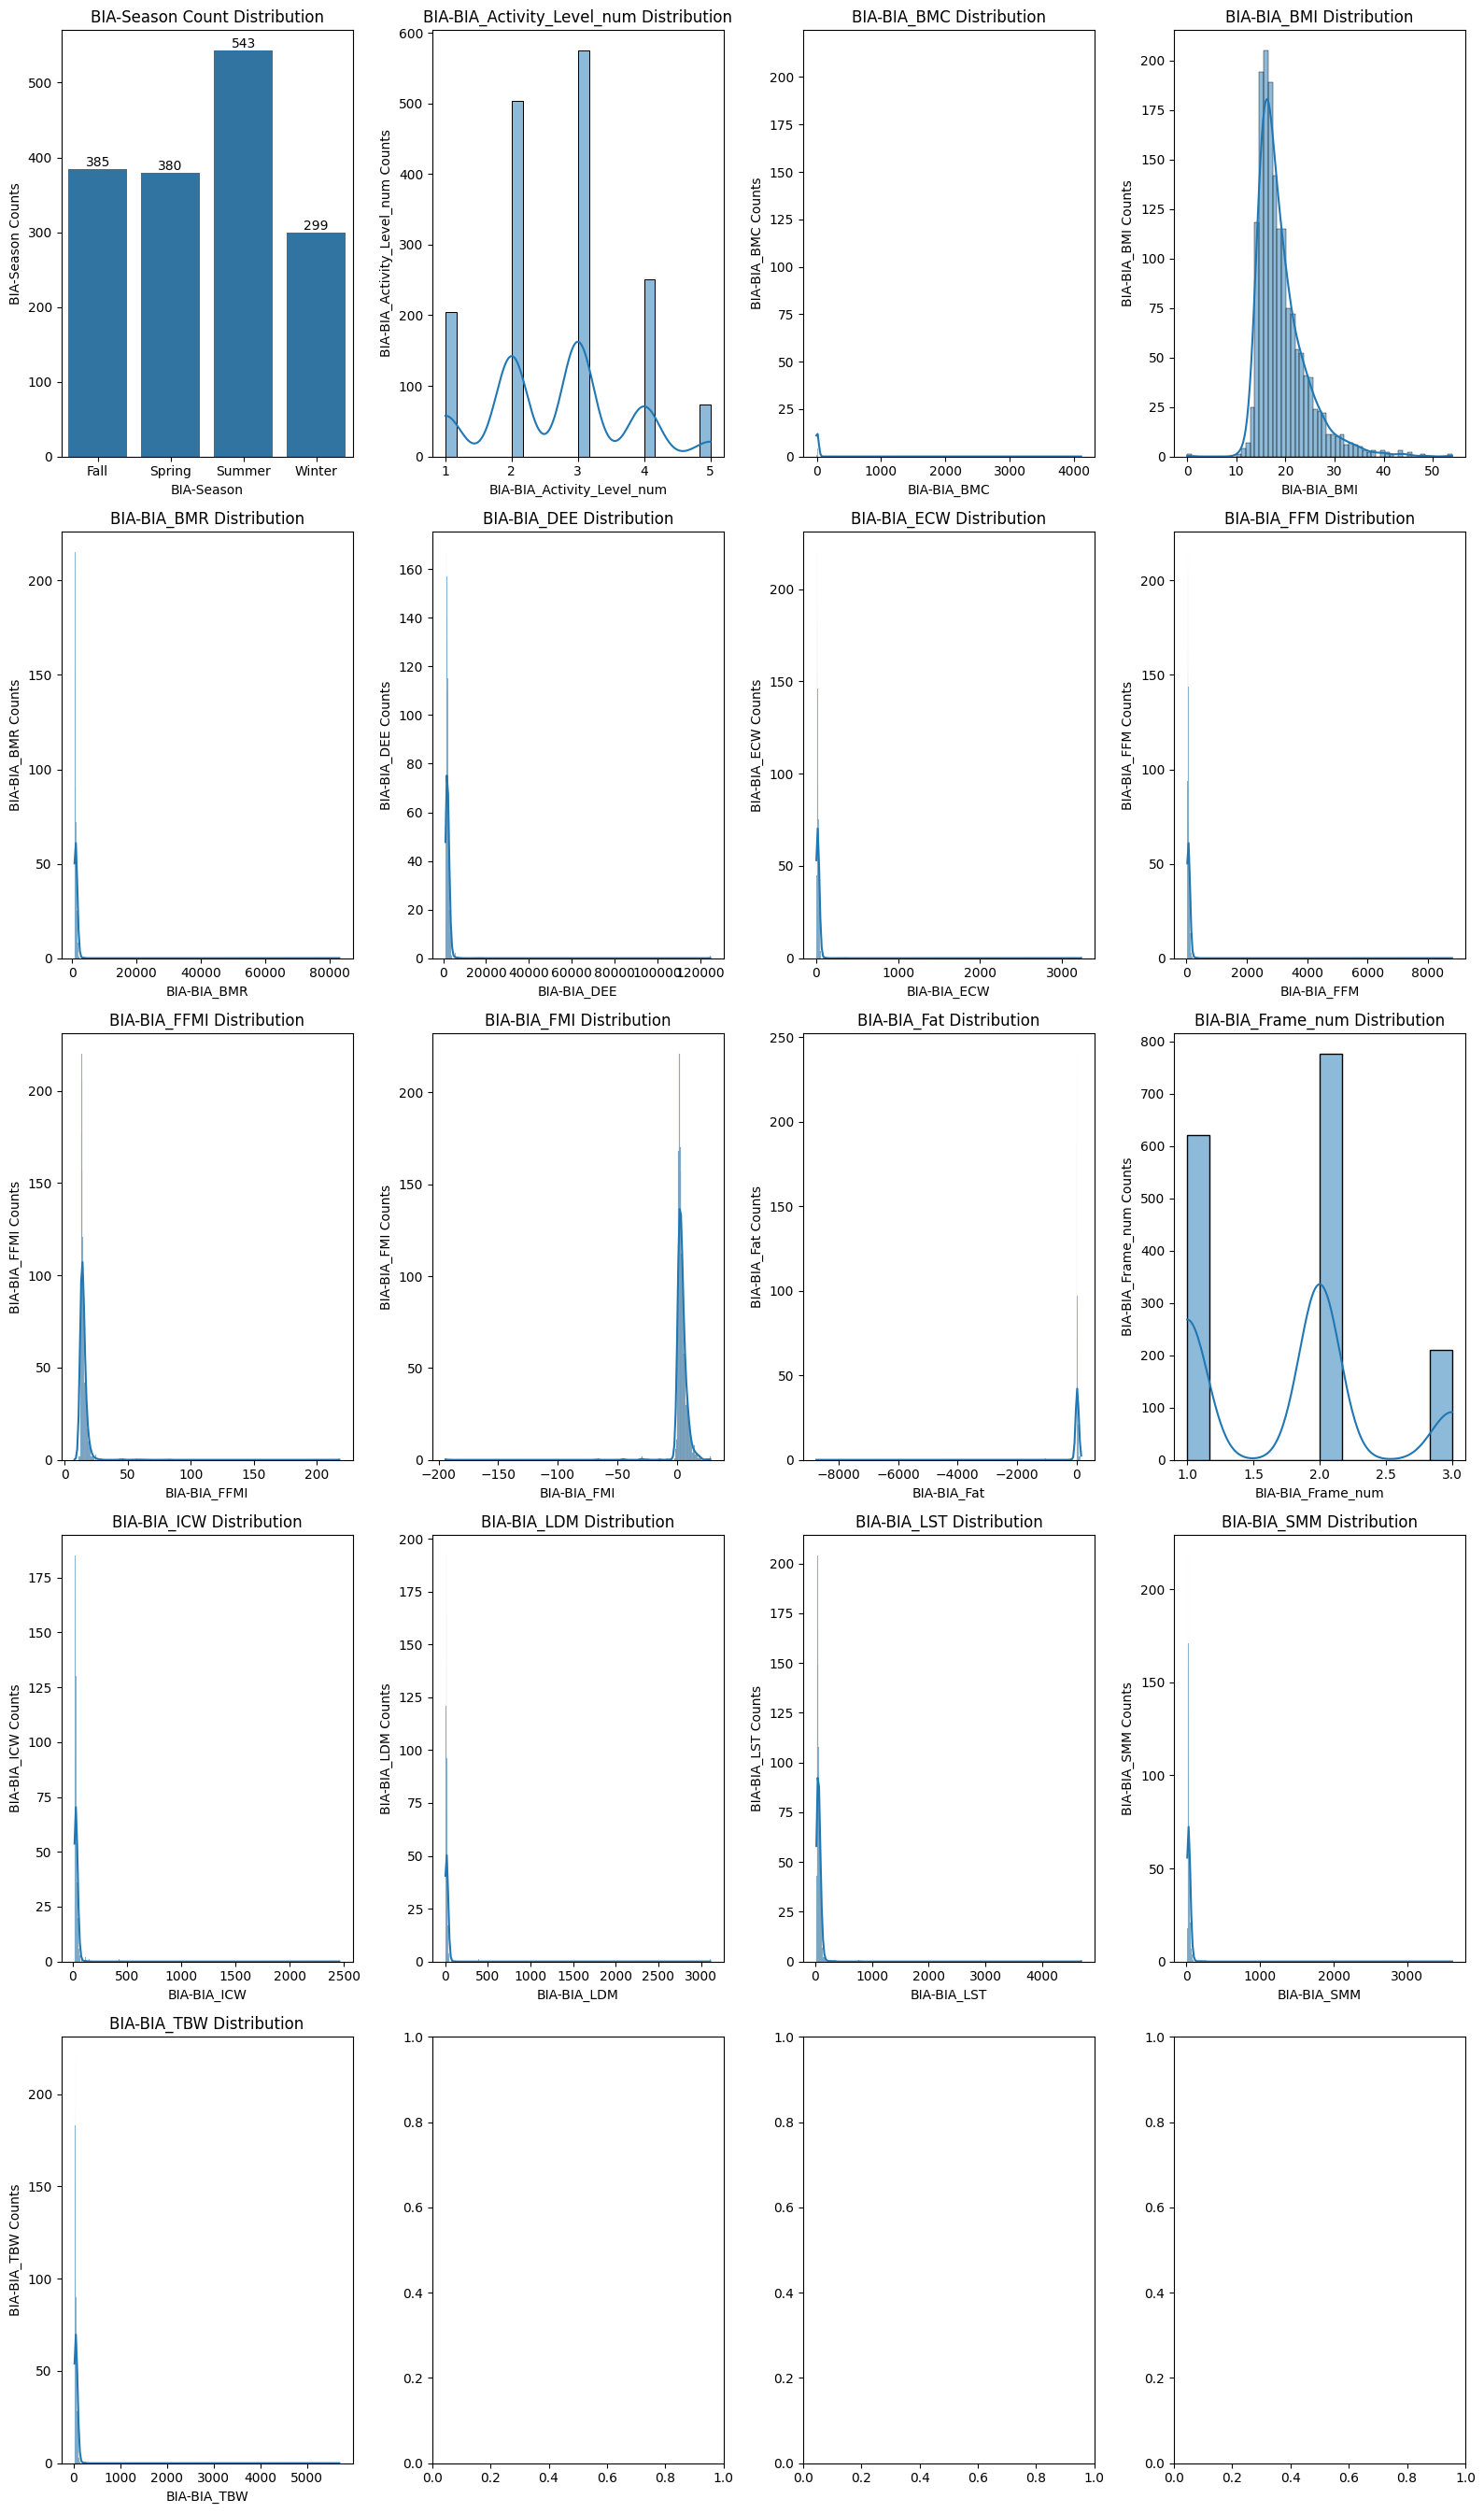

In [374]:
# Get the fitness data
bia_train_df = train_df.loc[:, train_df.columns.map(lambda x: x.split(sep='-')[0]) == 'BIA']

print('-----------------------------Sample Data----------------------------')
print(bia_train_df.head())
summarize_data(bia_train_df)
generate_eda_plot(bia_train_df)

## 2.12 Parent-Child Internet Addiction Test

-----------------------------Sample Data----------------------------
   BIA-Season  BIA-BIA_Activity_Level_num  BIA-BIA_BMC  BIA-BIA_BMI  \
0        Fall                         2.0      2.66855      16.8792   
2         NaN                         NaN          NaN          NaN   
3      Summer                         3.0      3.84191      18.2943   
5      Summer                         2.0      4.33036      30.1865   
11        NaN                         NaN          NaN          NaN   

    BIA-BIA_BMR  BIA-BIA_DEE  BIA-BIA_ECW  BIA-BIA_FFM  BIA-BIA_FFMI  \
0       932.498      1492.00      8.25598      41.5862       13.8177   
2           NaN          NaN          NaN          NaN           NaN   
3      1131.430      1923.44     15.59250      62.7757       14.0740   
5      1330.970      1996.45     30.21240      84.0285       16.6877   
11          NaN          NaN          NaN          NaN           NaN   

    BIA-BIA_FMI  BIA-BIA_Fat  BIA-BIA_Frame_num  BIA-BIA_ICW  BIA-BIA_L

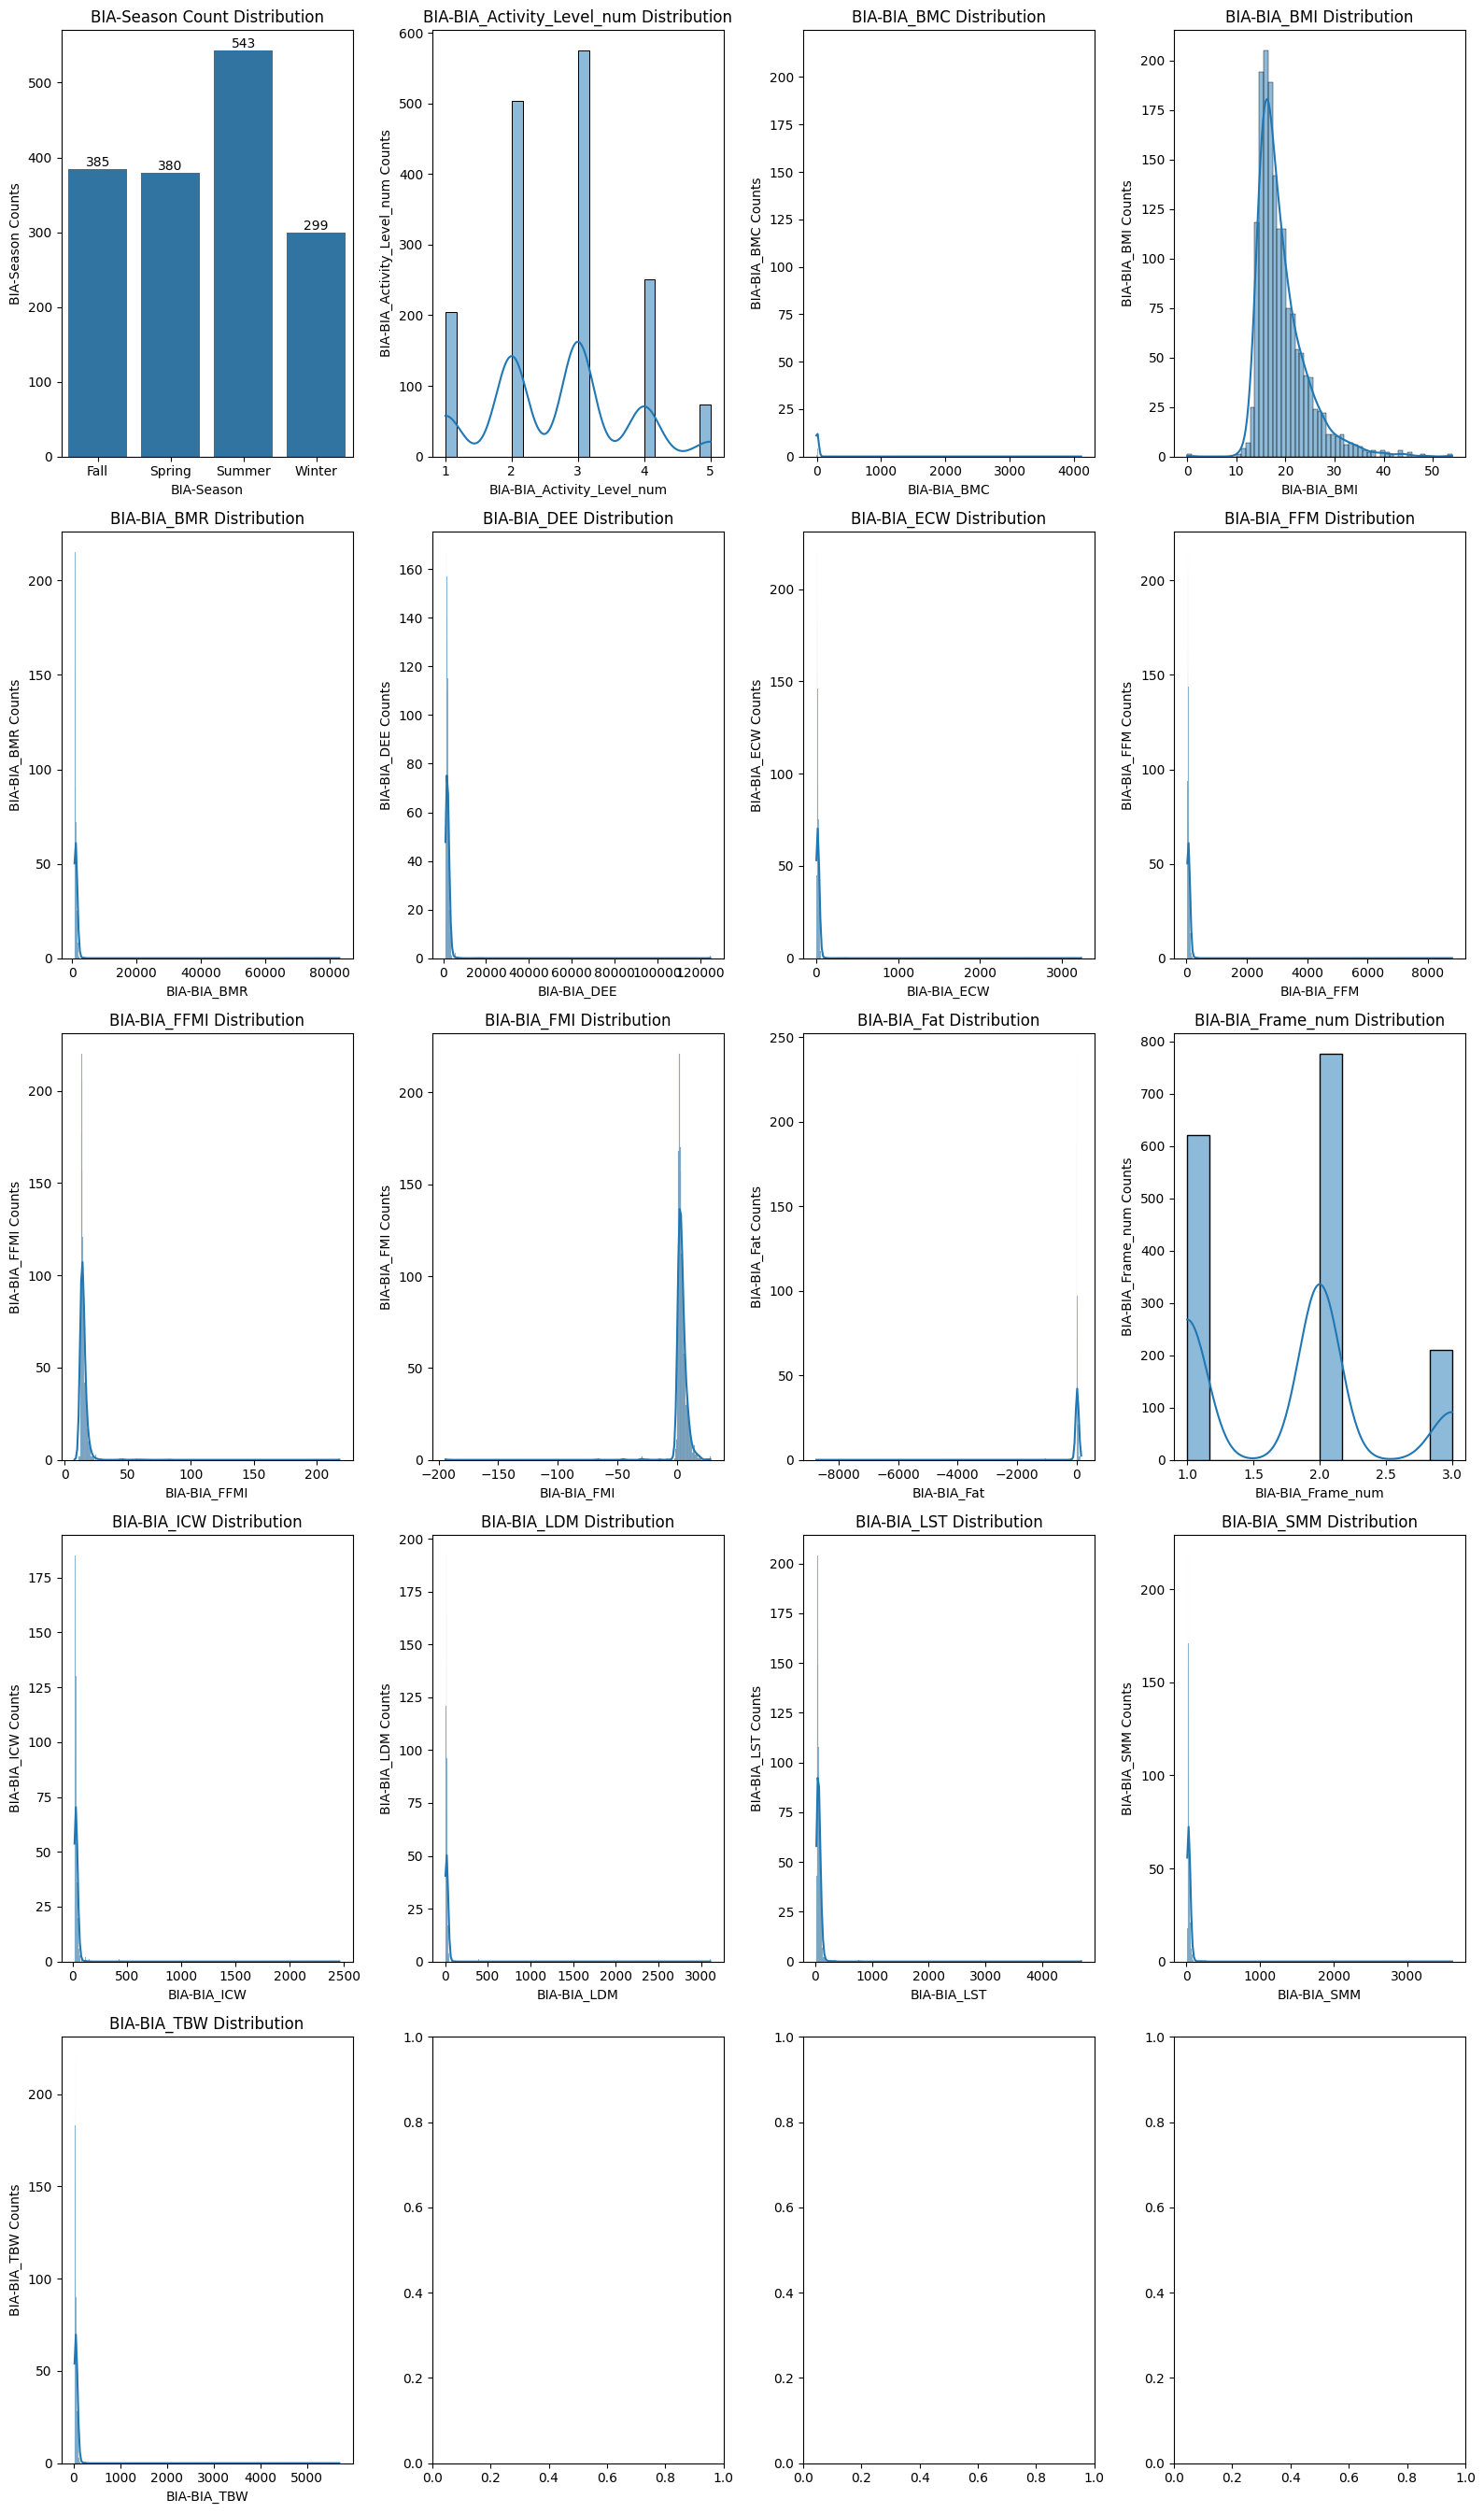

In [375]:
# Get the fitness data
bia_train_df = train_df.loc[:, train_df.columns.map(lambda x: x.split(sep='-')[0]) == 'BIA']

print('-----------------------------Sample Data----------------------------')
print(bia_train_df.head())
summarize_data(bia_train_df)
generate_eda_plot(bia_train_df)

## 2.13 Target

-----------------------------Sample Data----------------------------
    sii
0   2.0
2   0.0
3   1.0
5   1.0
11  0.0

------------------------Type & Null Analysis------------------------
<class 'pandas.core.frame.DataFrame'>
Index: 2420 entries, 0 to 3958
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   sii     2342 non-null   float64
dtypes: float64(1)
memory usage: 37.8 KB
None

------------------------Categorical Analysis------------------------
No Categorical Columns

-------------------------Numerical Analysis-------------------------
           sii
count  2342.00
mean      0.58
std       0.77
min       0.00
25%       0.00
50%       0.00
75%       1.00
max       3.00


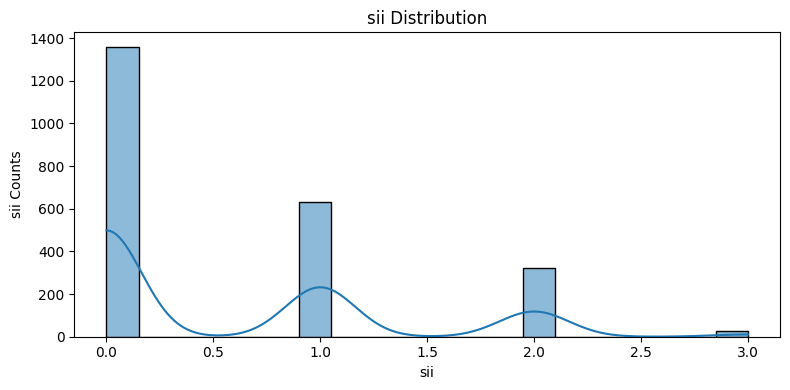

In [376]:
# 
sii_train_df = train_df.loc[:, ['sii']]

print('-----------------------------Sample Data----------------------------')
print(sii_train_df.head())
summarize_data(sii_train_df)
generate_eda_plot(sii_train_df)

# 3. Data Cleaning

In [377]:
# Remove season columns
train_df = train_df.loc[:, ~train_df.columns.map(lambda x: 'season' in x.lower())]